In [6]:
#imports
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler


In [7]:
#load data
df = pd.read_csv("../data/aggregated_data_with_changes.csv")
df = df[df['YEAR'] != 2013]

In [8]:
#methods to visualize the distribution of the variables
def plot_distribution(df, column): 
    plt.figure(figsize=(10, 6)) 
    sns.histplot(df[column], kde=True, bins=30) 
    plt.title(f'Distribution of {column}') 
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.show()

def check_normal_distribution(df, column):
    mean = df[column].mean()
    std = df[column].std()
    
    z_scores = (df[column] - mean) / std
    
    within_3_std = np.sum((z_scores > -3) & (z_scores < 3)) / len(z_scores)
    
    is_normal = within_3_std > 0.99  # If 99% of data points fall within -3 and 3, consider it normally distributed
    
    # if is_normal:
    #     print(f"The column '{column}' is normally distributed.")
    # else:
    #     print(f"The column '{column}' is not normally distributed.")

    return is_normal

def evaluate_transformations(df, column):
    transformations = {
        'original': df[column],
        'log': np.log(df[column] + 1),
        'sqrt': np.sqrt(df[column]),
        'boxcox': stats.boxcox(df[column] + 1)[0],
        'yeojohnson': PowerTransformer(method='yeo-johnson').fit_transform(df[[column]])
    }
    
    results = {}
    
    for name, data in transformations.items():
        # Calculate Z-scores
        z_scores = (data - data.mean()) / data.std()
        # Perform Shapiro-Wilk test
        shapiro_test = stats.shapiro(data)
        
        results[name] = {
            'z_scores': z_scores,
            'shapiro_statistic': shapiro_test[0],
            'shapiro_p_value': shapiro_test[1]
        }
        
        # Plot distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(z_scores, kde=True, bins=30)
        plt.title(f'Distribution of Z-scores for {name} transformation')
        plt.xlabel('Z-scores')
        plt.ylabel('Frequency')
        plt.show()
        
    return results


def print_normal_distribution_likelihood(results):
    for transformation, result in results.items():
        shapiro_statistic = result['shapiro_statistic']
        shapiro_p_value = result['shapiro_p_value']
        
        print(f"Transformation: {transformation}")
        print(f"Shapiro-Wilk Statistic: {shapiro_statistic:.4f}")
        print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}")
        
        if shapiro_p_value > 0.05:
            print("Likelihood of normal distribution: High\n")
        elif shapiro_p_value > 0.01:
            print("Likelihood of normal distribution: Moderate\n")
        else:
            print("Likelihood of normal distribution: Low\n")

def normalize_and_standardize_column(df, column):
    # Initialize the scalers
    min_max_scaler = MinMaxScaler()
    standard_scaler = StandardScaler()
    
    # Normalize the column (scale to 0-1 range)
    df[f'{column}_normalized'] = min_max_scaler.fit_transform(df[[column]])
    
    # Standardize the column (mean=0, std=1)
    df[f'{column}_standardized'] = standard_scaler.fit_transform(df[[column]])
    
    return df

['mean_anxiety', 'mean_anxiety_normalized', 'mean_anxiety_standardized', 'mean_bipolar', 'mean_bipolar_normalized', 'mean_bipolar_standardized', 'mean_depression', 'mean_depression_normalized', 'mean_depression_standardized', 'mean_mental hospital', 'mean_mental hospital_normalized', 'mean_mental hospital_standardized', 'mean_psychologist near me', 'mean_psychologist near me_normalized', 'mean_psychologist near me_standardized', 'mean_therapist near me', 'mean_therapist near me_normalized', 'mean_therapist near me_standardized', 'median_anxiety', 'median_anxiety_normalized', 'median_anxiety_standardized', 'median_bipolar', 'median_bipolar_normalized', 'median_bipolar_standardized', 'median_depression', 'median_depression_normalized', 'median_depression_standardized', 'median_mental hospital', 'median_mental hospital_normalized', 'median_mental hospital_standardized', 'median_psychologist near me', 'median_psychologist near me_normalized', 'median_psychologist near me_standardized', 'me

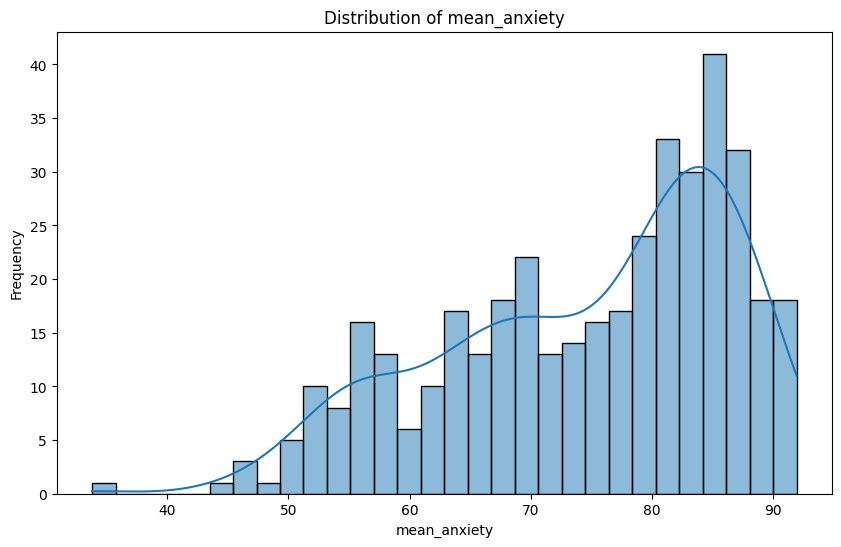

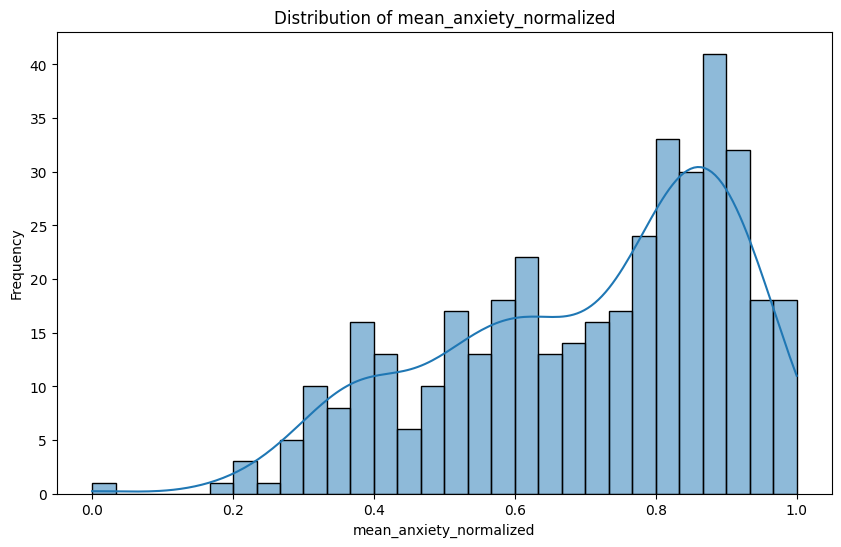

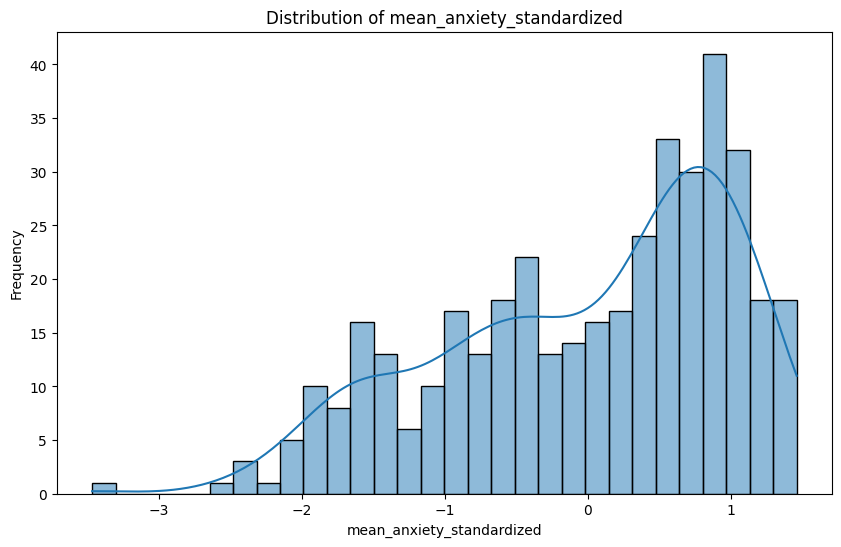

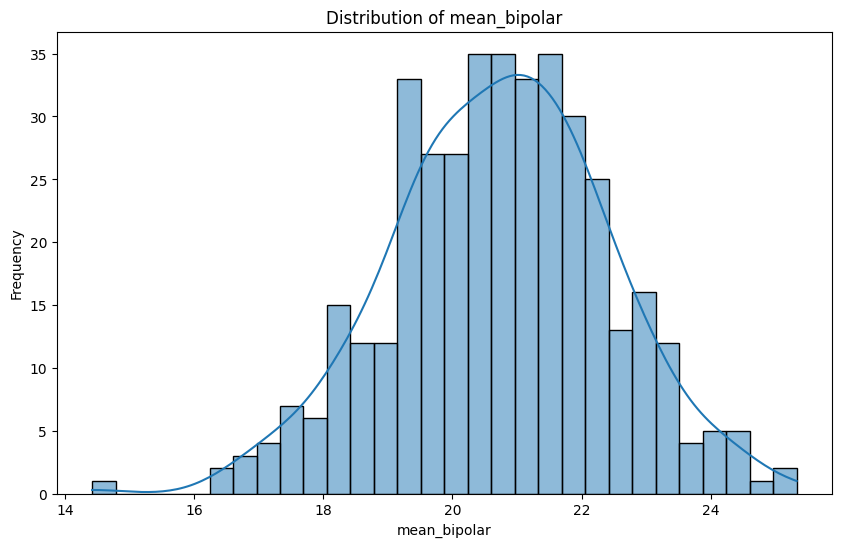

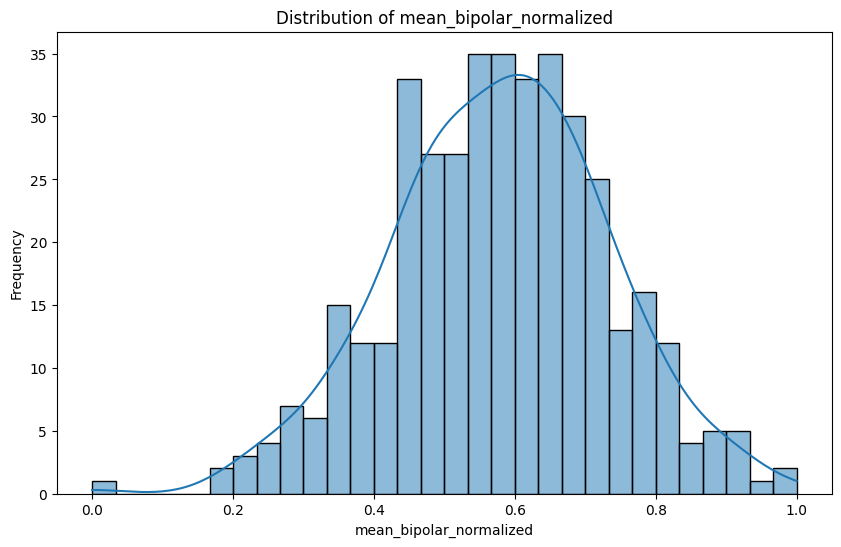

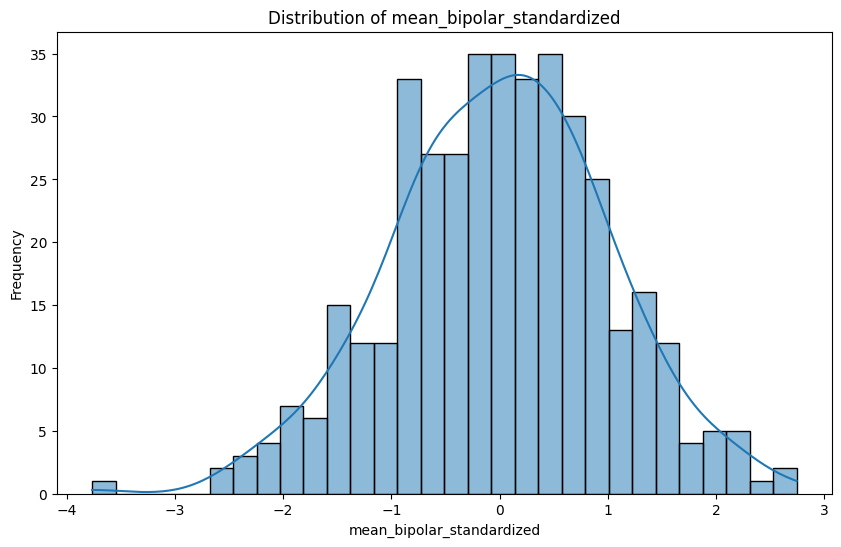

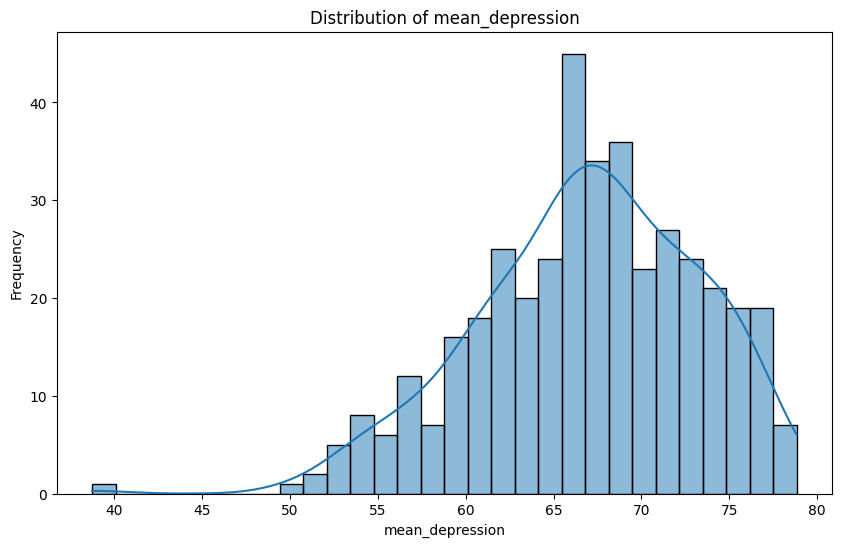

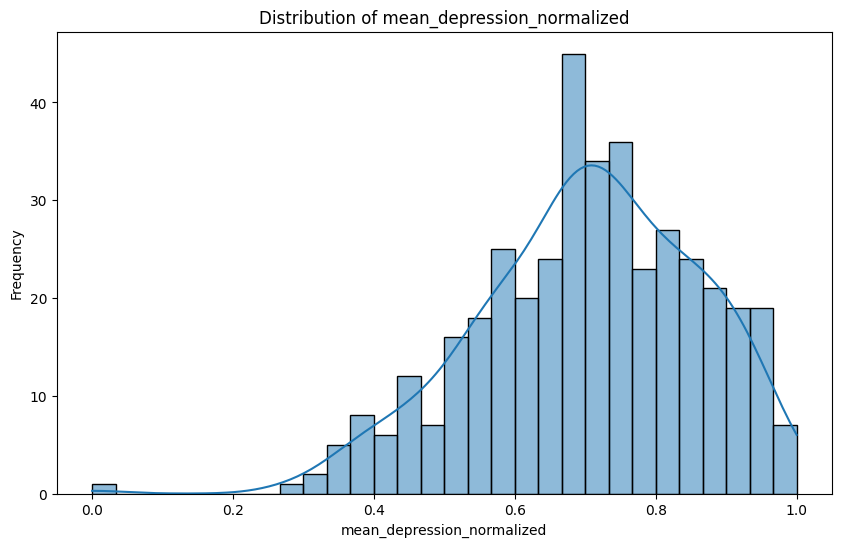

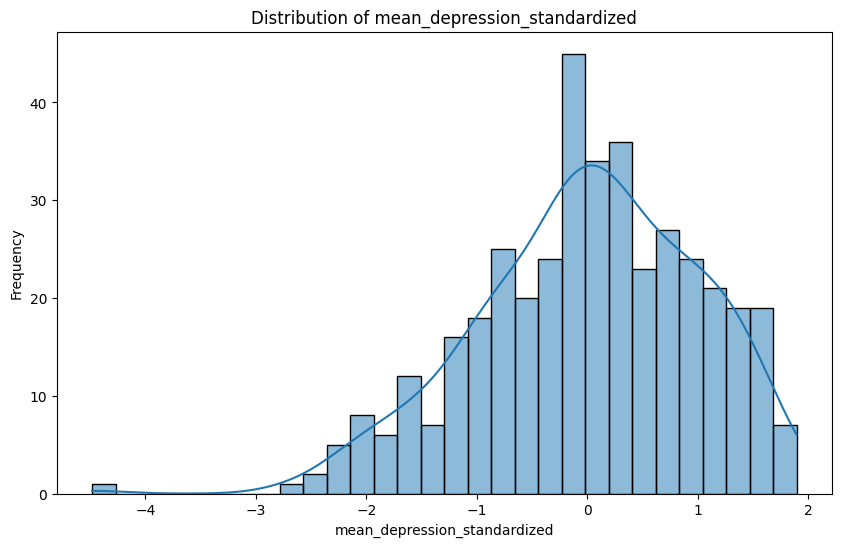

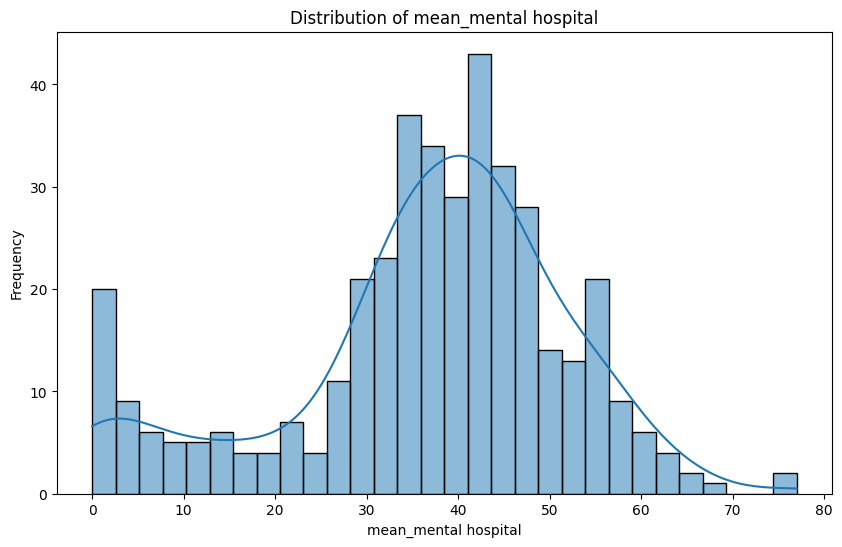

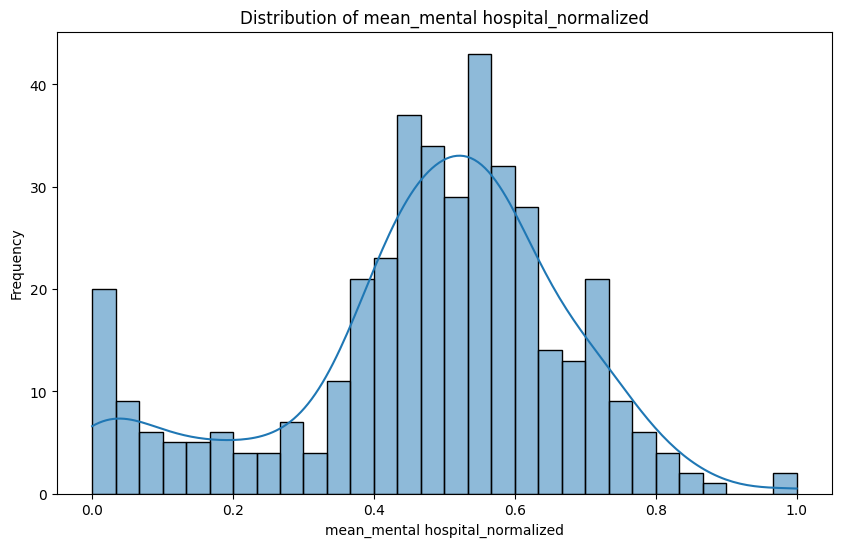

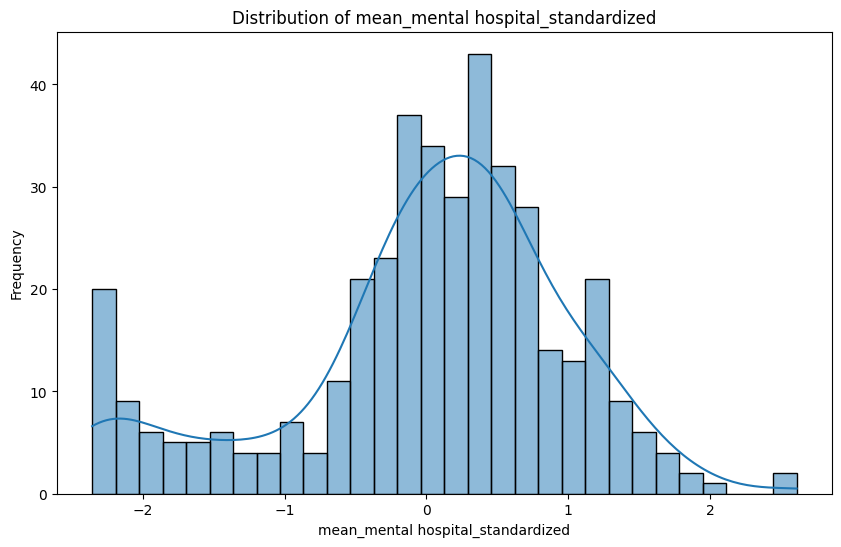

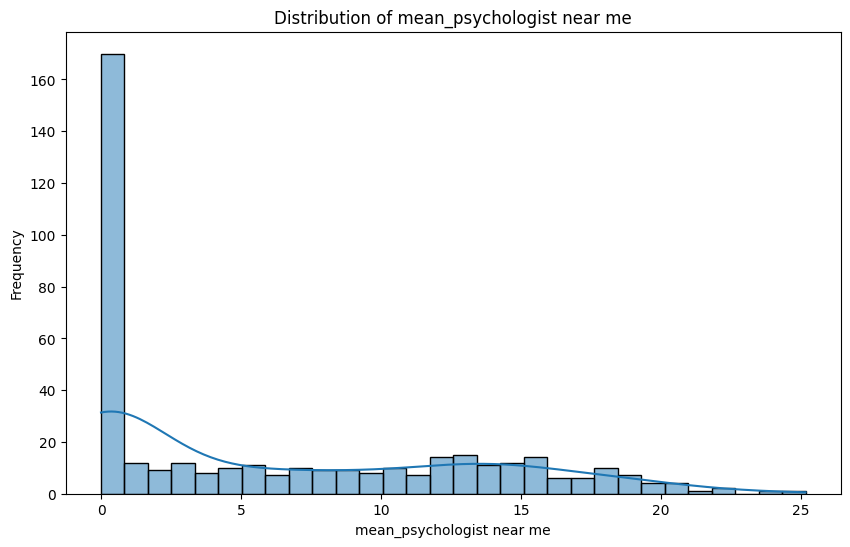

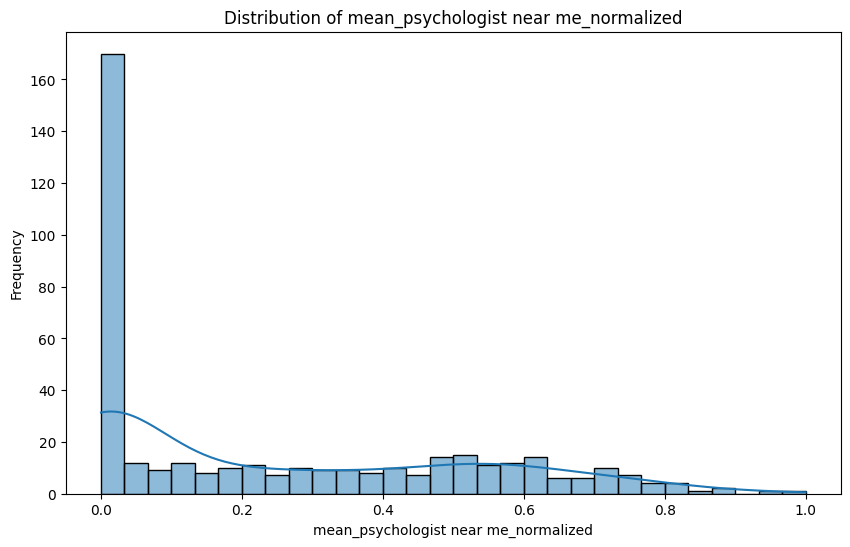

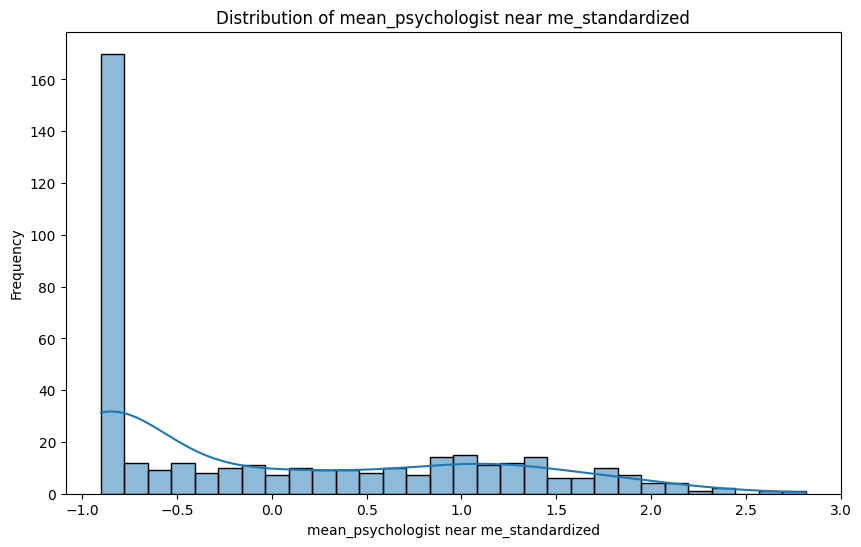

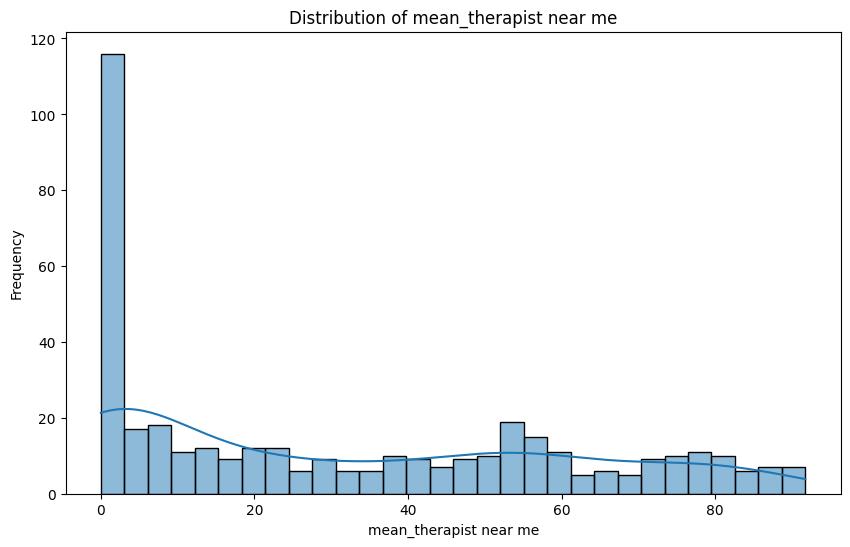

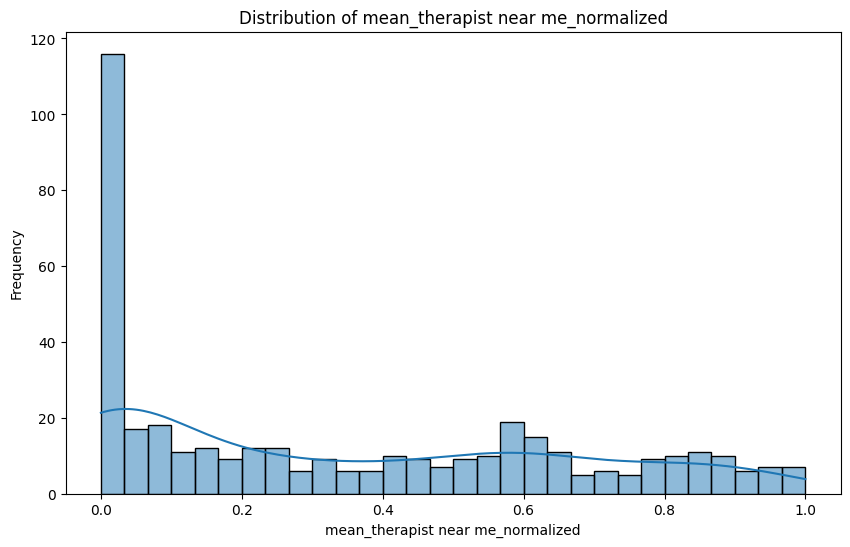

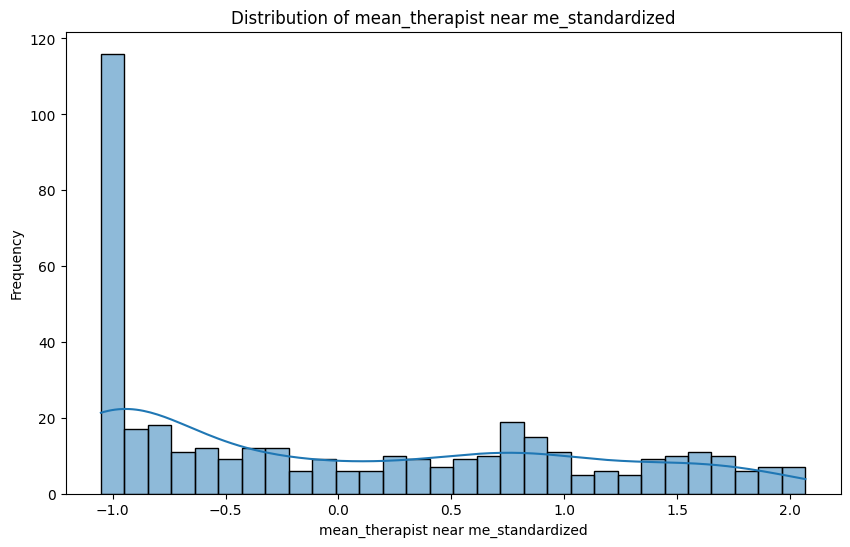

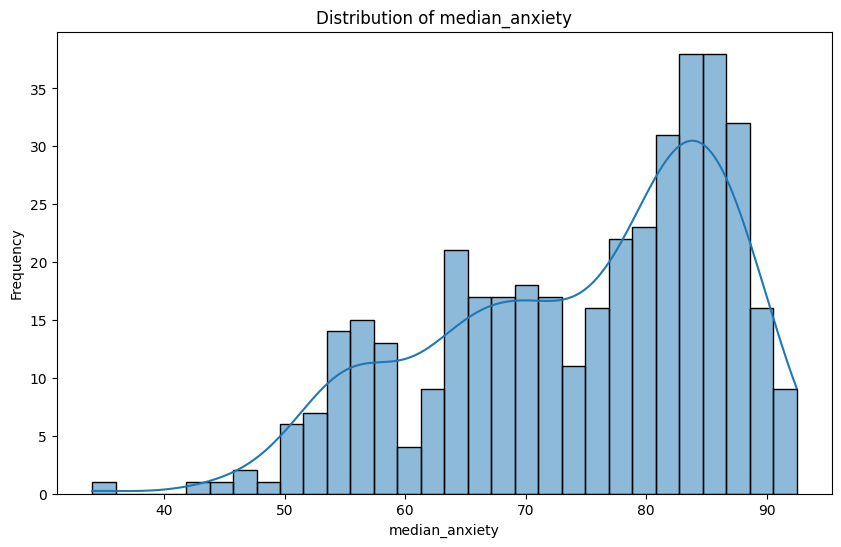

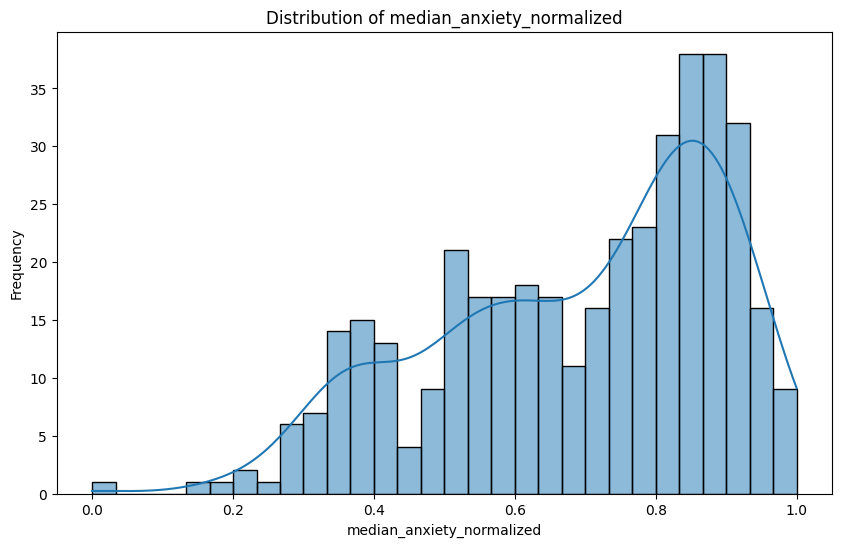

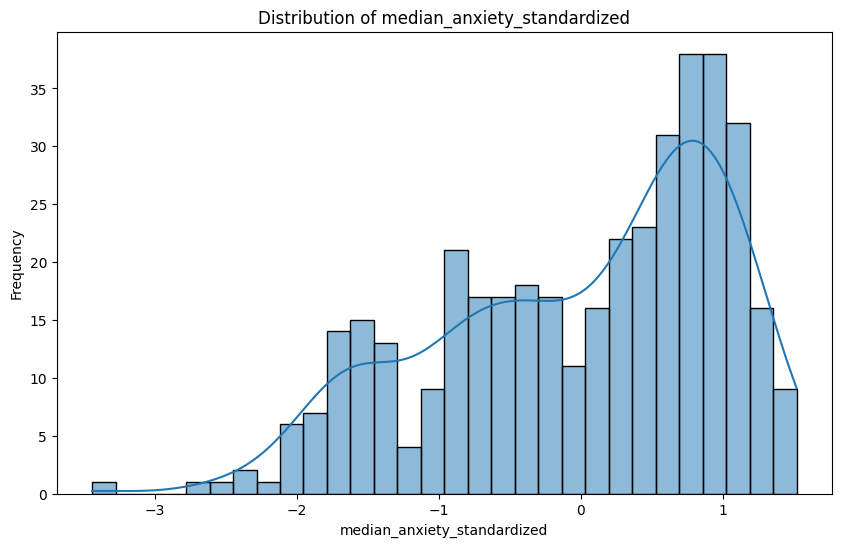

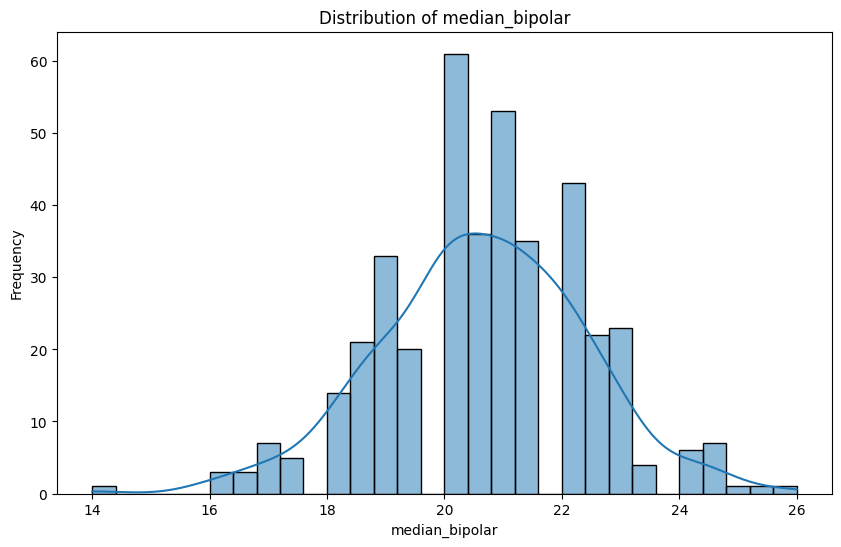

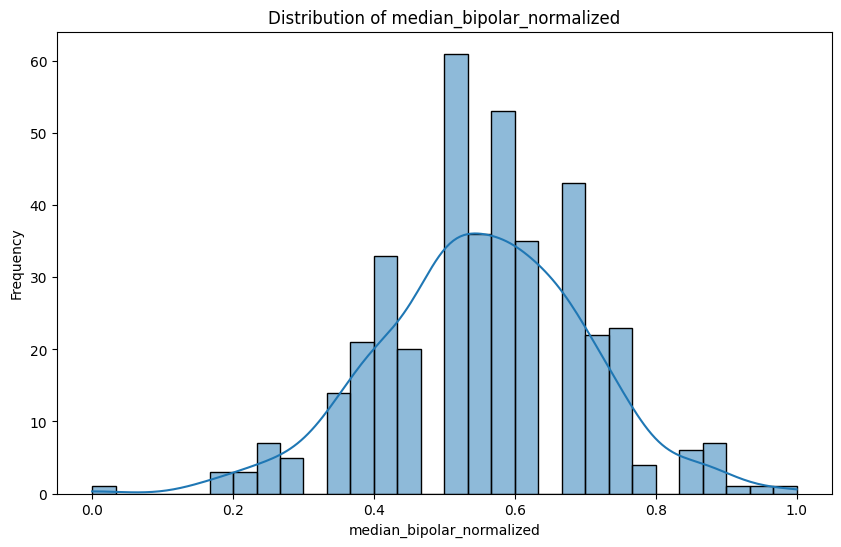

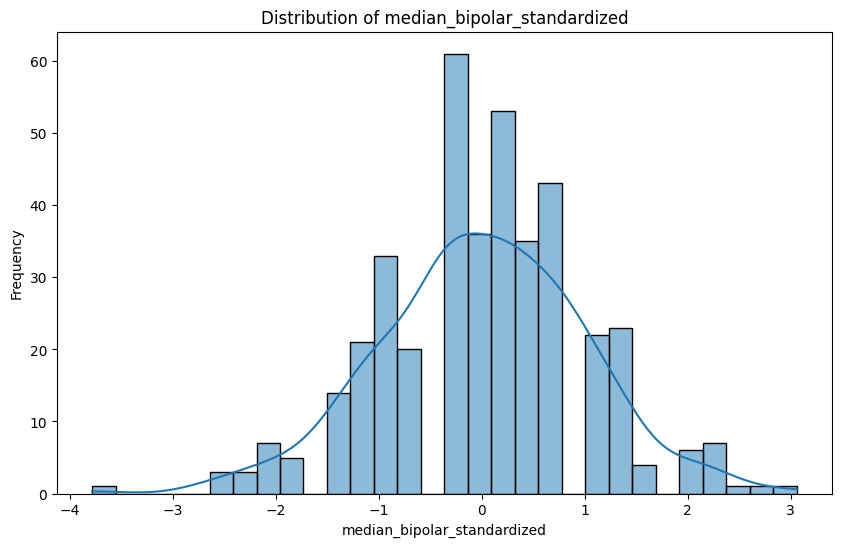

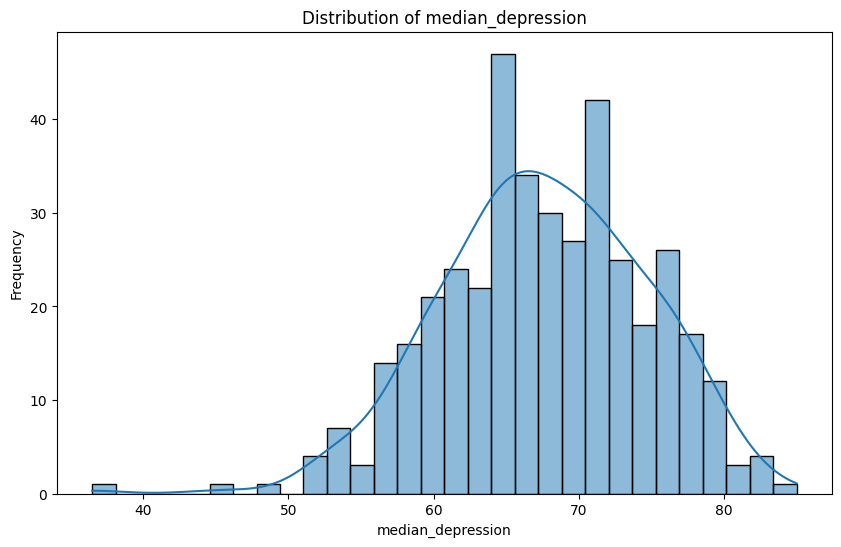

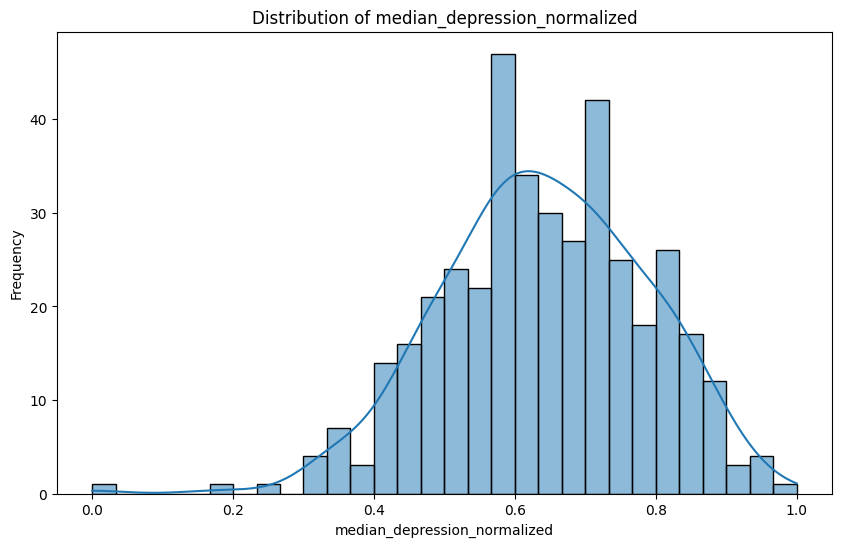

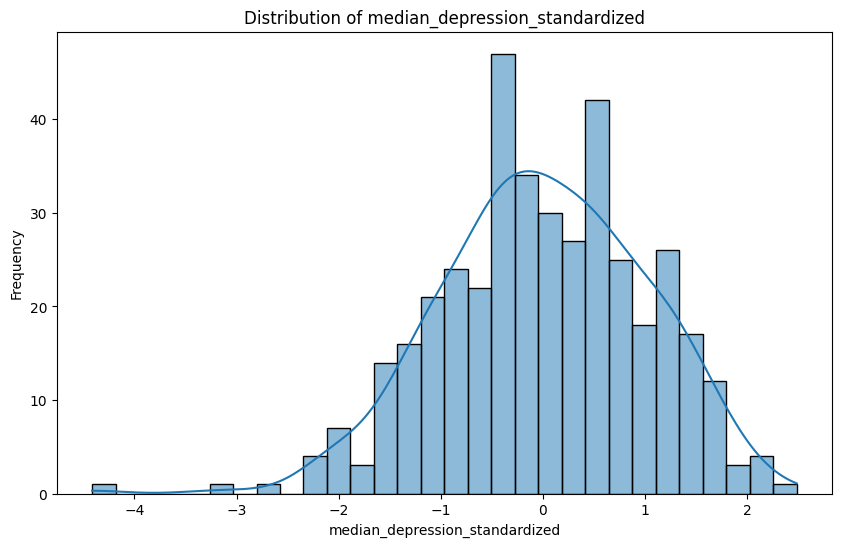

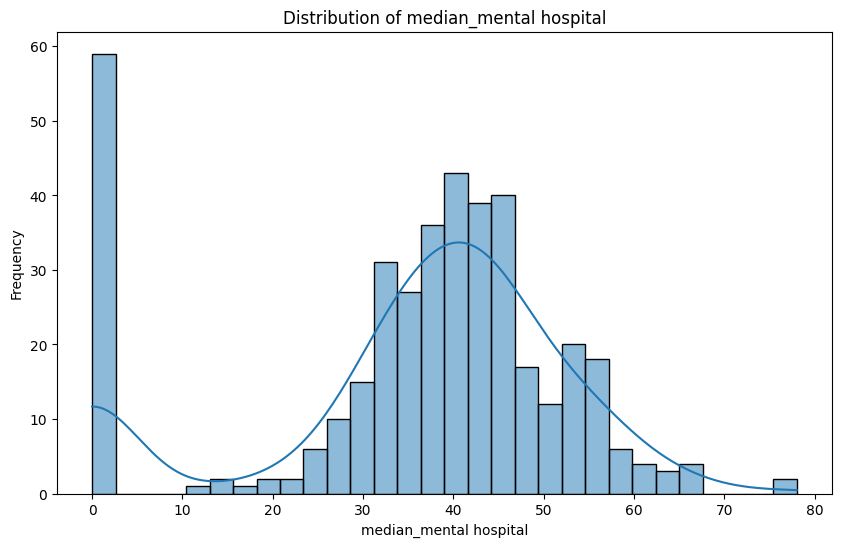

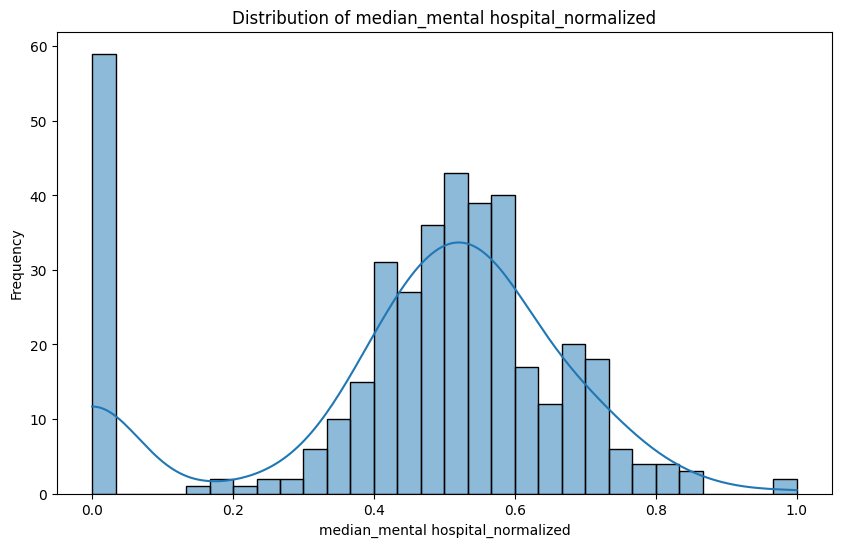

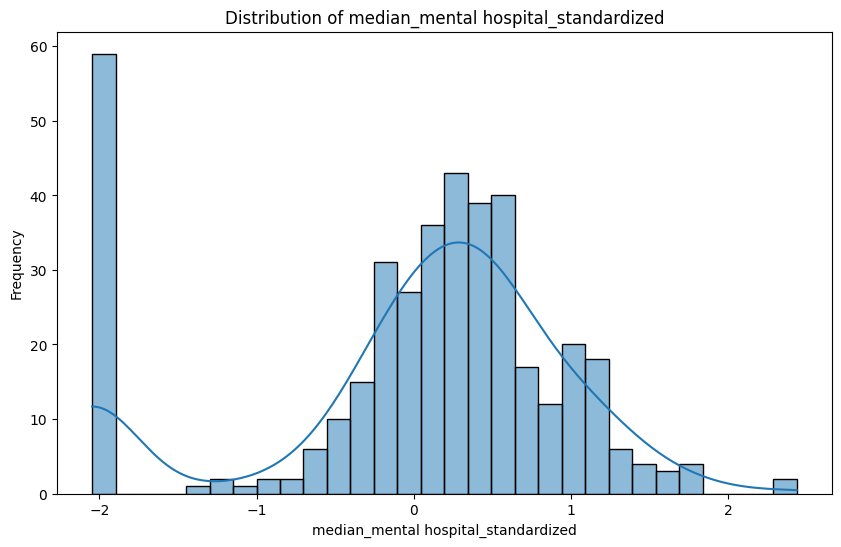

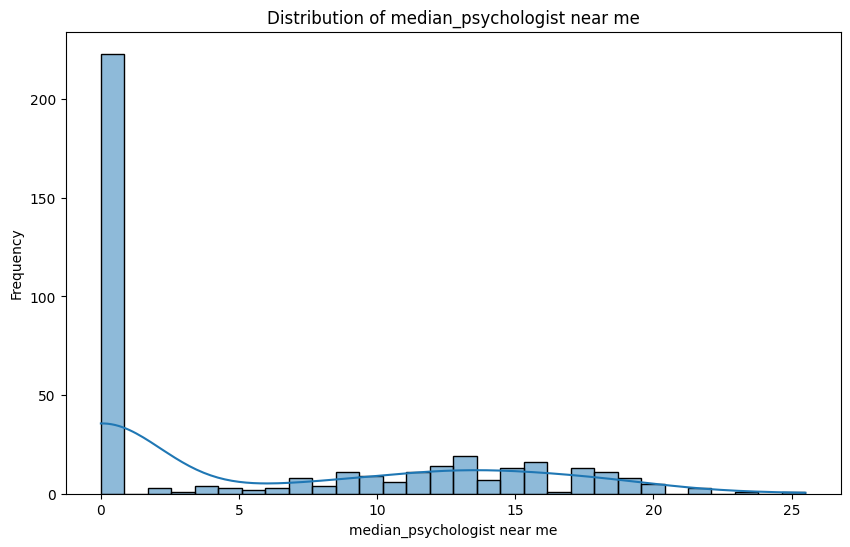

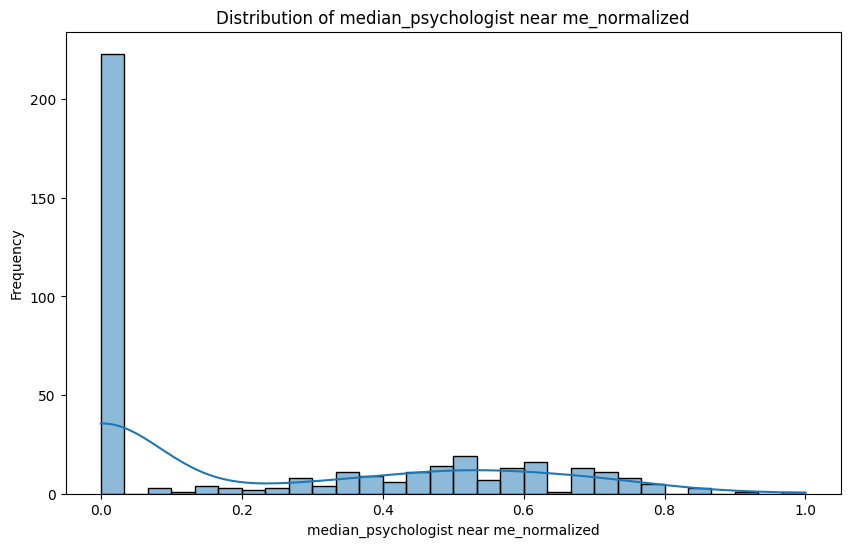

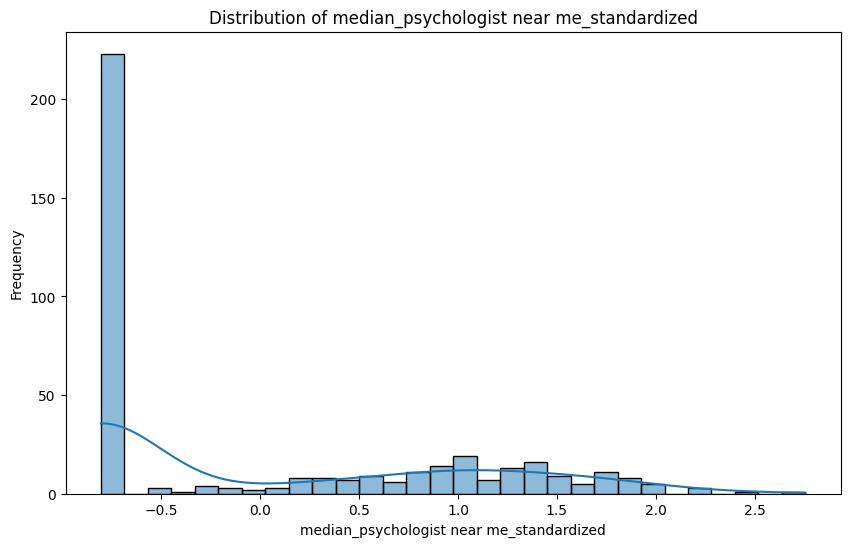

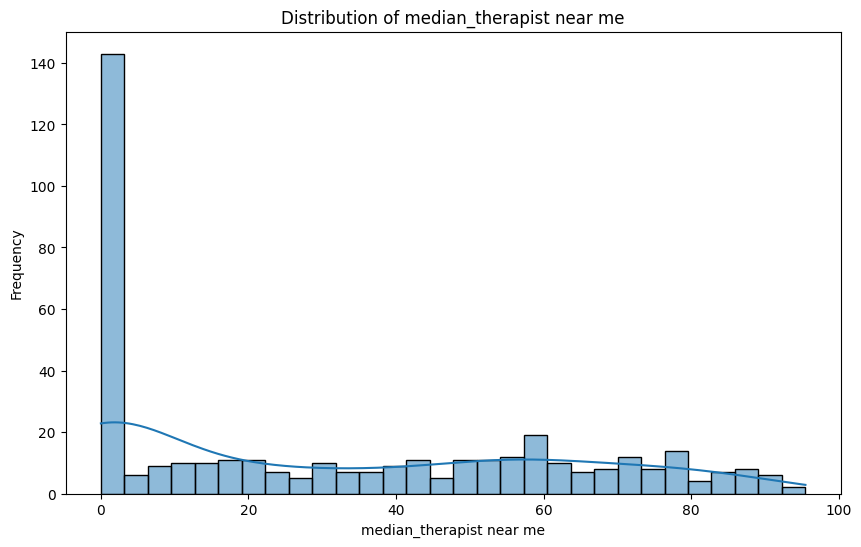

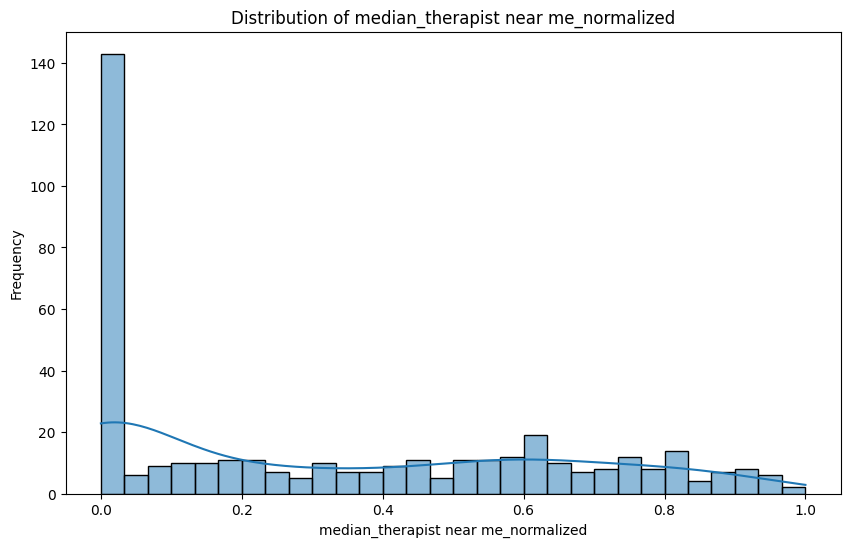

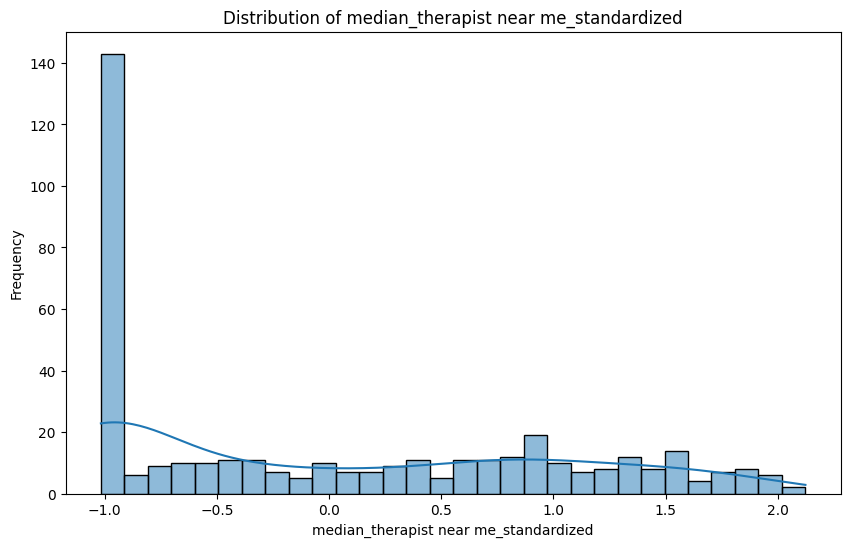

In [9]:
feature_cols = ["mean_ADHD", "mean_PTSD", "mean_anxiety", "mean_bipolar", "mean_depression",
                "mean_mental hospital", "mean_psychologist near me", "mean_psychiatrists near me", "mean_therapist near me",
                "median_ADHD", "median_PTSD", "median_anxiety", "median_bipolar", "median_depression",
                "median_mental hospital", "median_psychologist near me", "median_psychiatrists near me", "median_therapist near me"
                ]

pt = PowerTransformer(method='yeo-johnson')
normal_distributed_cols = []
for col in feature_cols:
    if check_normal_distribution(df, col):
        normal_distributed_cols.append(col)
    df = normalize_and_standardize_column(df, col)
    if check_normal_distribution(df, f'{col}_normalized'):
        normal_distributed_cols.append(f'{col}_normalized')
    if check_normal_distribution(df, f'{col}_standardized'):
        normal_distributed_cols.append(f'{col}_standardized')


    # print_normal_distribution_likelihood(evaluate_transformations(df, col)) 
    # nd = check_normal_distribution(df, col)
    # if not nd:
    #     df[f'{col}_column_sqrt'] = np.sqrt(df[col])
    #     if check_normal_distribution(df, f'{col}_column_sqrt'):
    #         normal_distributed_cols.append(f'{col}_column_sqrt')
    #     df[f'{col}_column_yeojohnson'] = pt.fit_transform(df[[col]])
    #     if check_normal_distribution(df,f'{col}_column_yeojohnson'):
    #         normal_distributed_cols.append(f'{col}_column_yeojohnson')
    # else:
    #     normal_distributed_cols.append(col)

print(normal_distributed_cols)
for col in normal_distributed_cols:
    plot_distribution(df, col)



In [10]:
district_mean_cols = ["mean_ADHD_district_mean", "mean_PTSD_district_mean", "mean_anxiety_district_mean", 
                      "mean_bipolar_district_mean", "mean_depression_district_mean", "mean_mental hospital_district_mean", 
                      "mean_psychologist near me_district_mean", "mean_psychiatrists near me_district_mean", "mean_therapist near me_district_mean",
                      "median_ADHD_district_mean", "median_PTSD_district_mean", "median_anxiety_district_mean", 
                      "median_bipolar_district_mean", "median_depression_district_mean", "median_mental hospital_district_mean", 
                      "median_psychologist near me_district_mean", "median_psychiatrists near me_district_mean", "median_therapist near me_district_mean"]


pt = PowerTransformer(method='yeo-johnson')
normal_distributed_cols = []
for col in district_mean_cols:
    if check_normal_distribution(df, col):
        normal_distributed_cols.append(col)
    df = normalize_and_standardize_column(df, col)
    if check_normal_distribution(df, f'{col}_normalized'):
        normal_distributed_cols.append(f'{col}_normalized')
    if check_normal_distribution(df, f'{col}_standardized'):
        normal_distributed_cols.append(f'{col}_standardized')


    # print_normal_distribution_likelihood(evaluate_transformations(df, col)) 
    # nd = check_normal_distribution(df, col)
    # if not nd:
    #     df[f'{col}_column_sqrt'] = np.sqrt(df[col])
    #     if check_normal_distribution(df, f'{col}_column_sqrt'):
    #         normal_distributed_cols.append(f'{col}_column_sqrt')
    #     df[f'{col}_column_yeojohnson'] = pt.fit_transform(df[[col]])
    #     if check_normal_distribution(df,f'{col}_column_yeojohnson'):
    #         normal_distributed_cols.append(f'{col}_column_yeojohnson')
    # else:
    #     normal_distributed_cols.append(col)

print(normal_distributed_cols)
for col in normal_distributed_cols:
    plot_distribution(df, col)

KeyError: 'mean_ADHD_district_mean'

C:\Users\johnb\AppData\Local\Temp\ipykernel_2340\3086106612.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\johnb\AppData\Local\Temp\ipykernel_2340\3086106612.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


['mean_ADHD_val_change', 'mean_ADHD_val_change_normalized', 'mean_ADHD_val_change_standardized', 'mean_ADHD_perc_change', 'mean_ADHD_perc_change_normalized', 'mean_ADHD_perc_change_standardized', 'mean_bipolar_val_change', 'mean_bipolar_val_change_normalized', 'mean_bipolar_val_change_standardized', 'mean_bipolar_perc_change', 'mean_bipolar_perc_change_normalized', 'mean_bipolar_perc_change_standardized', 'mean_depression_val_change', 'mean_depression_val_change_normalized', 'mean_depression_val_change_standardized', 'mean_depression_perc_change', 'mean_depression_perc_change_normalized', 'mean_depression_perc_change_standardized', 'mean_psychologist near me_val_change', 'mean_psychologist near me_val_change_normalized', 'mean_psychologist near me_val_change_standardized', 'mean_therapist near me_val_change', 'mean_therapist near me_val_change_normalized', 'mean_therapist near me_val_change_standardized', 'median_ADHD_val_change', 'median_ADHD_val_change_normalized', 'median_ADHD_val_c

C:\Users\johnb\AppData\Local\Temp\ipykernel_2340\3086106612.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\johnb\AppData\Local\Temp\ipykernel_2340\3086106612.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


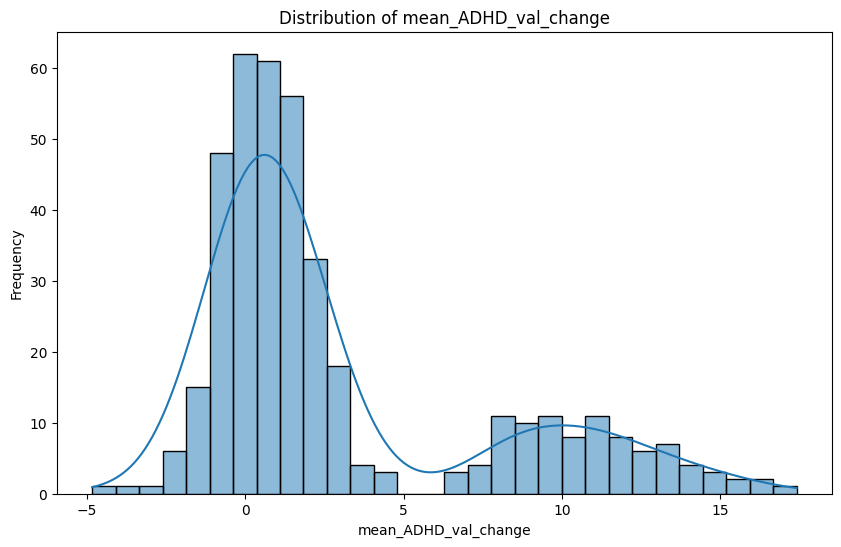

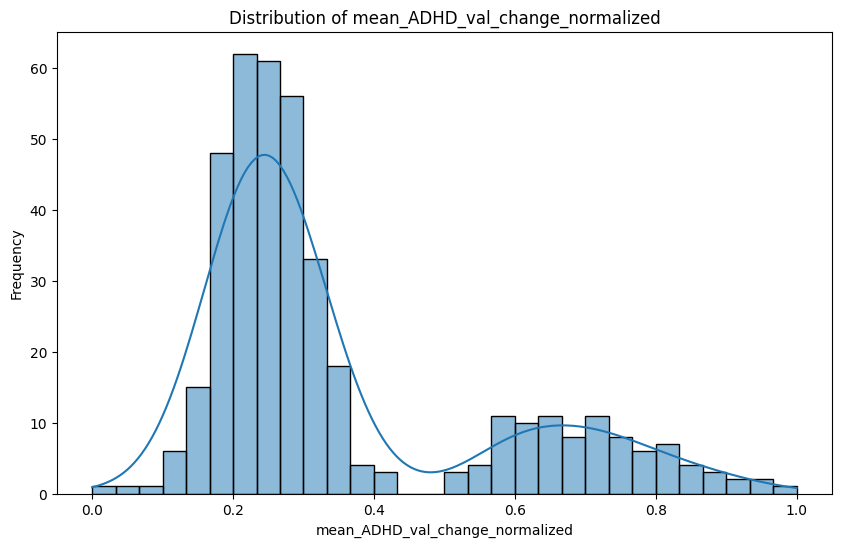

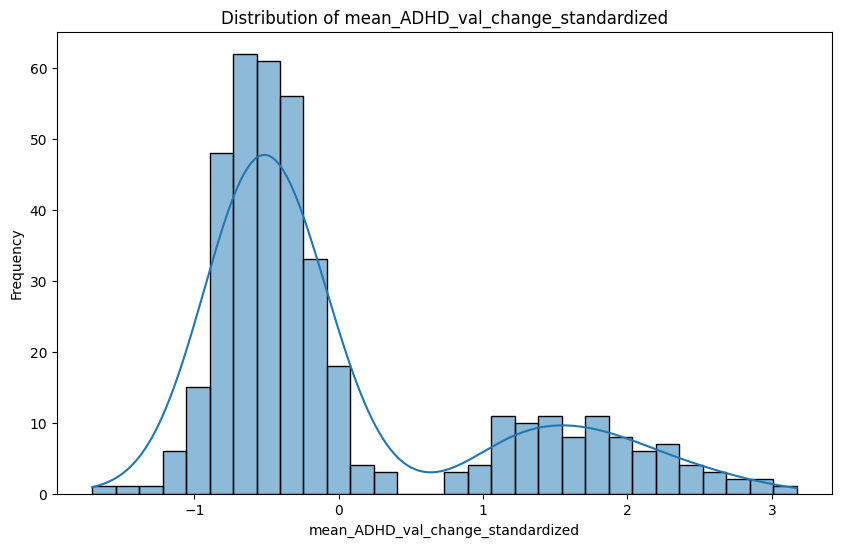

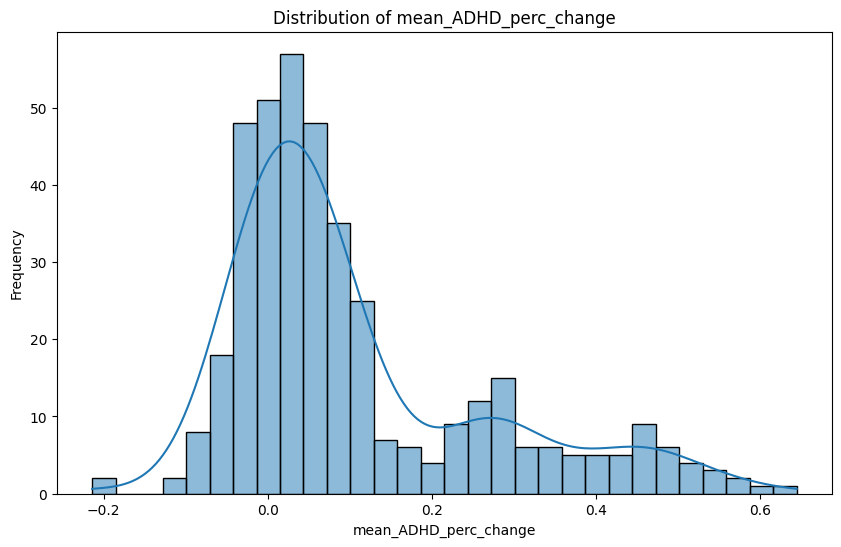

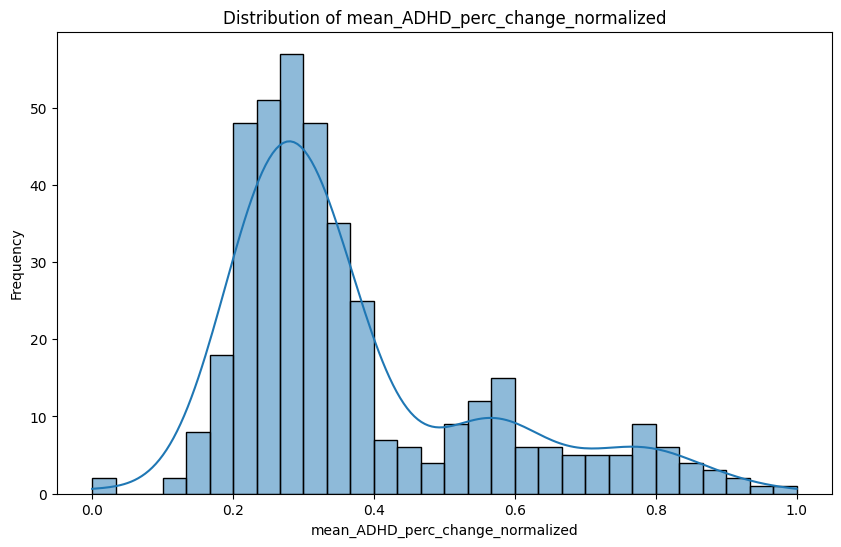

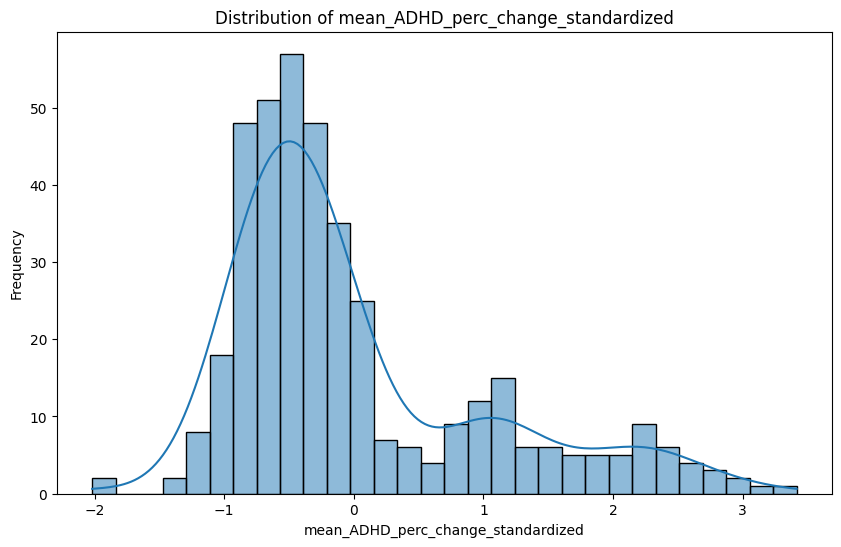

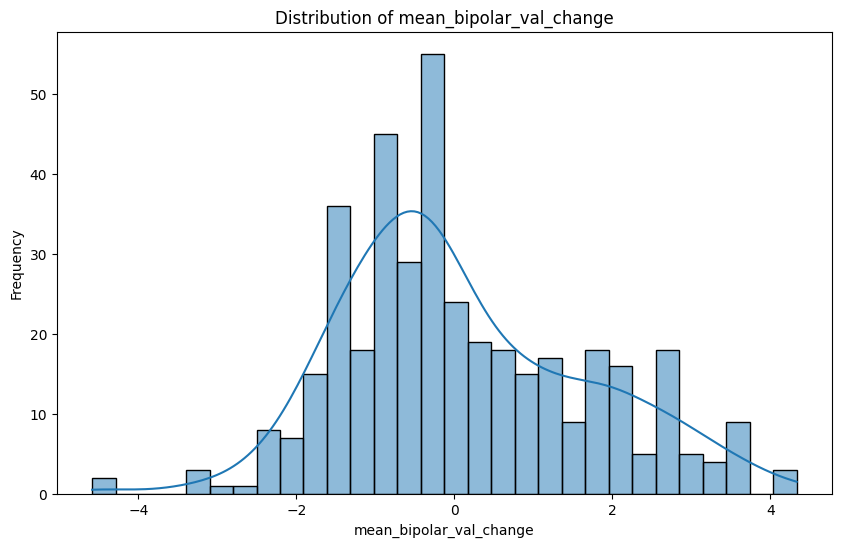

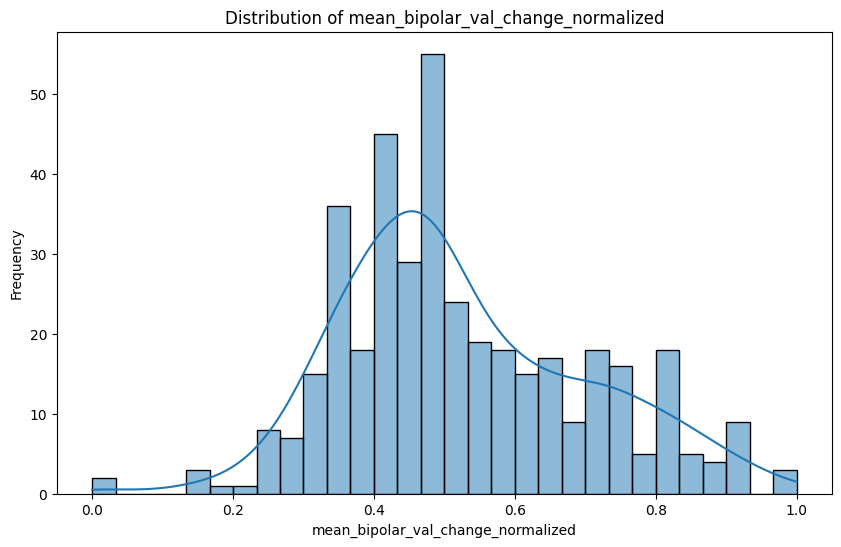

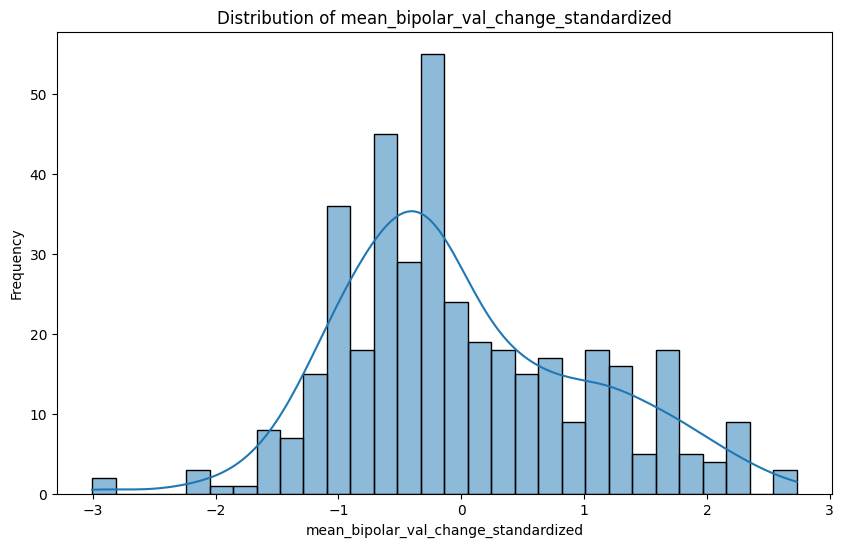

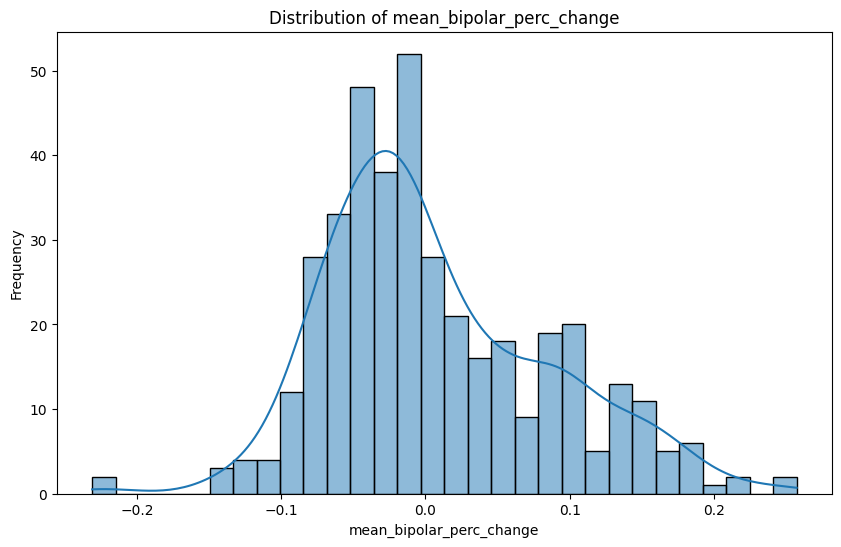

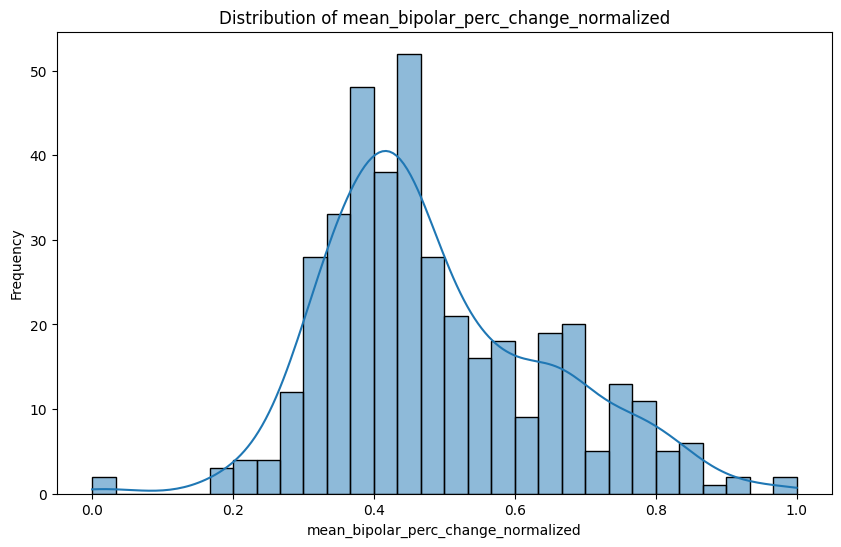

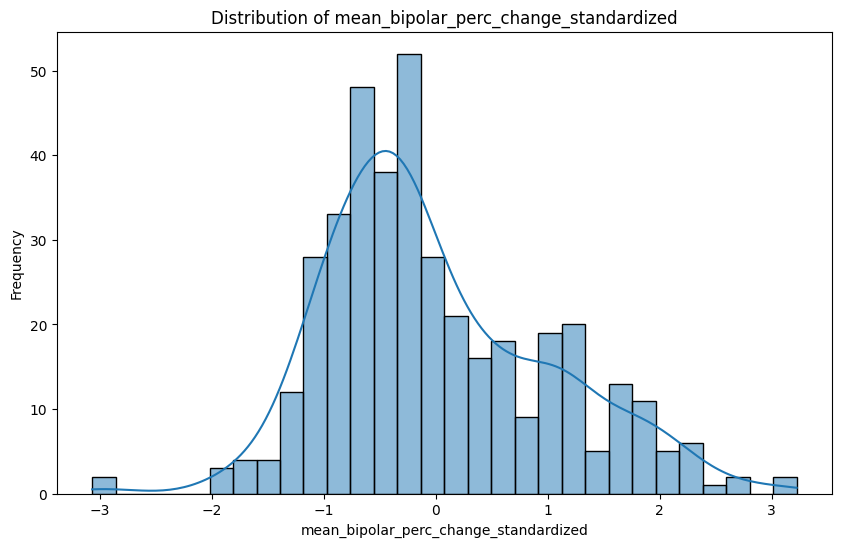

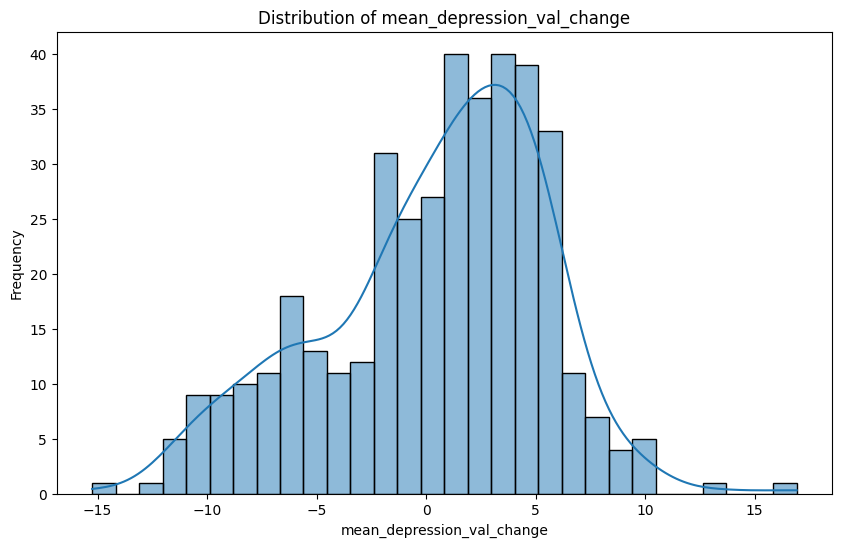

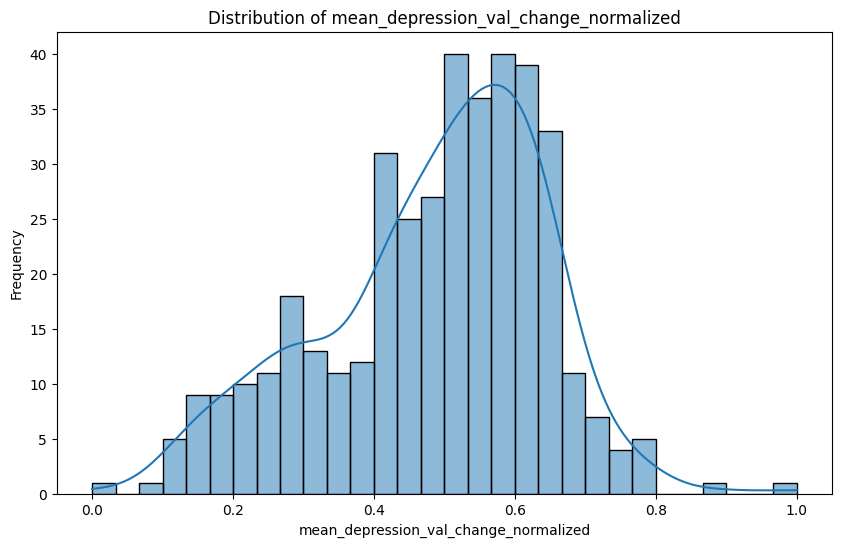

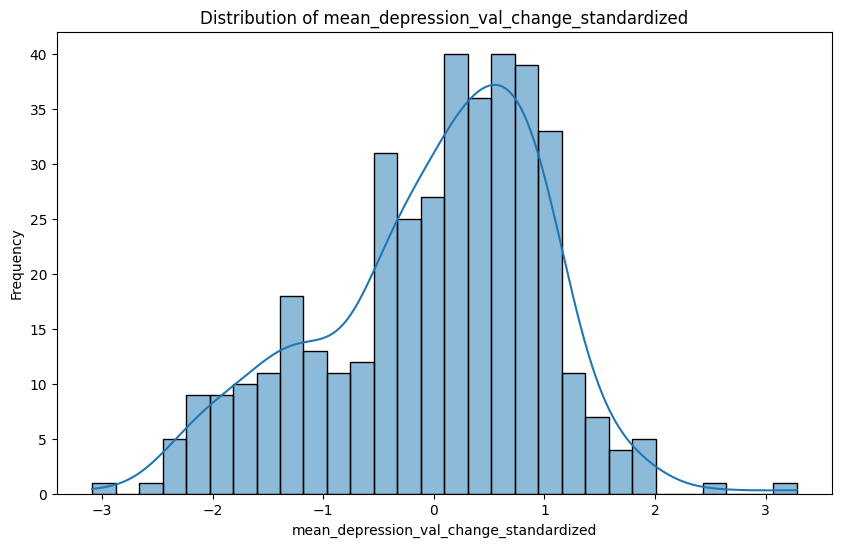

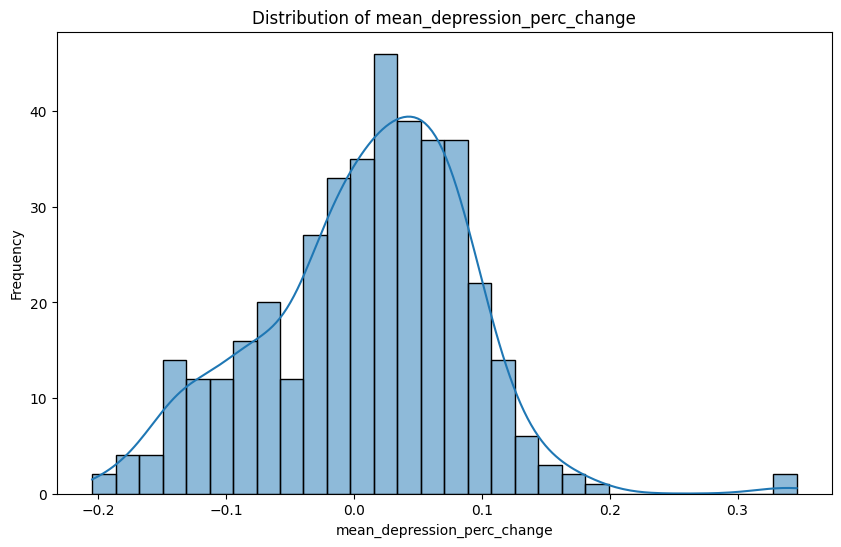

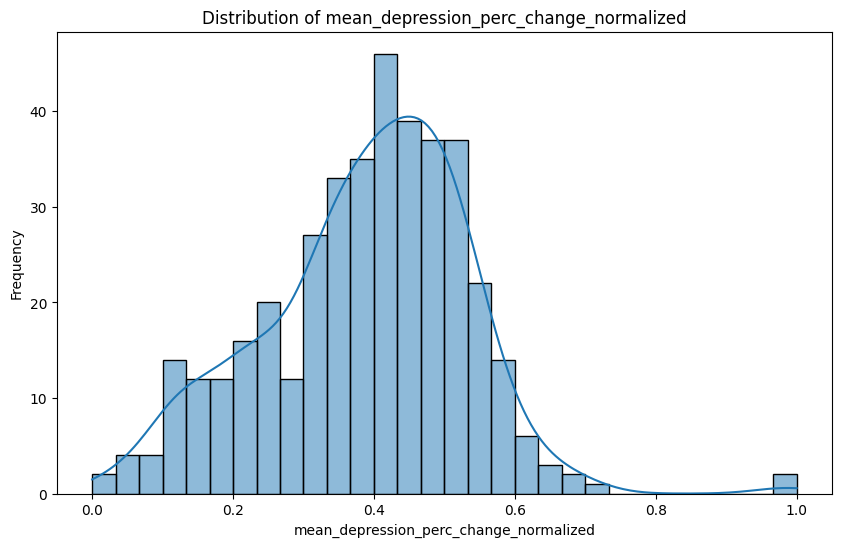

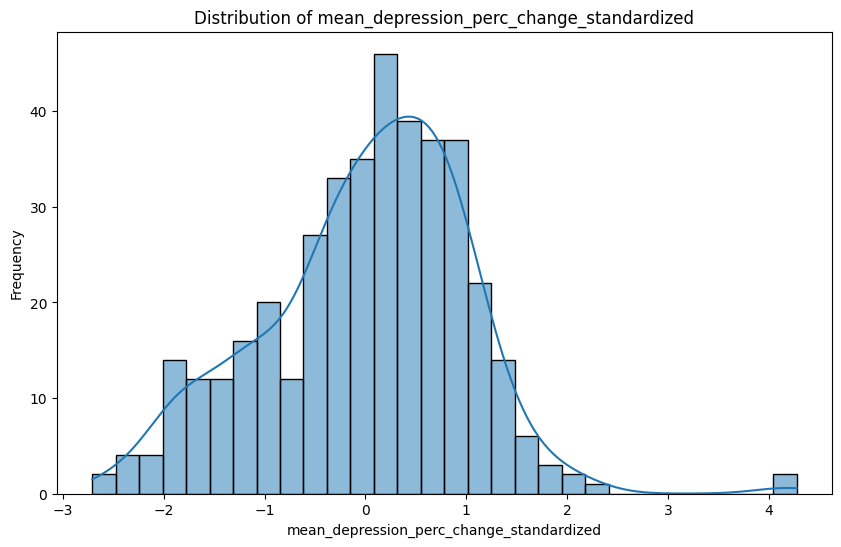

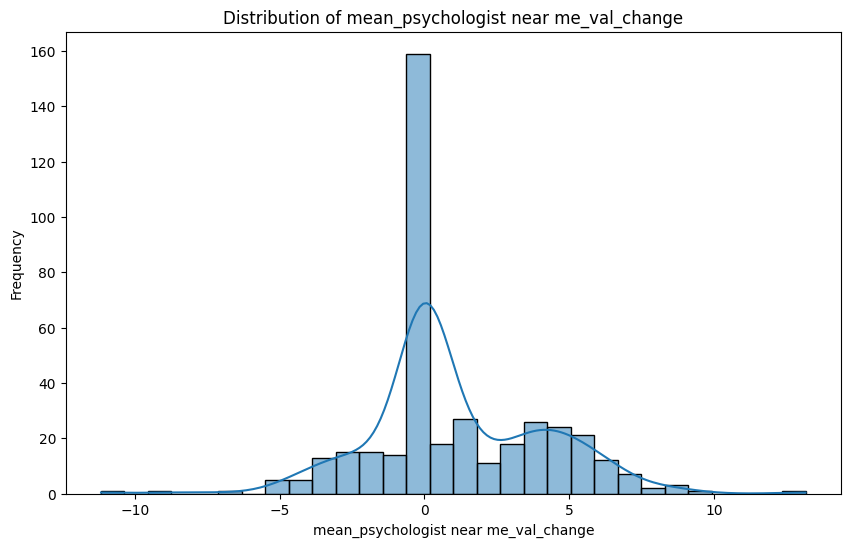

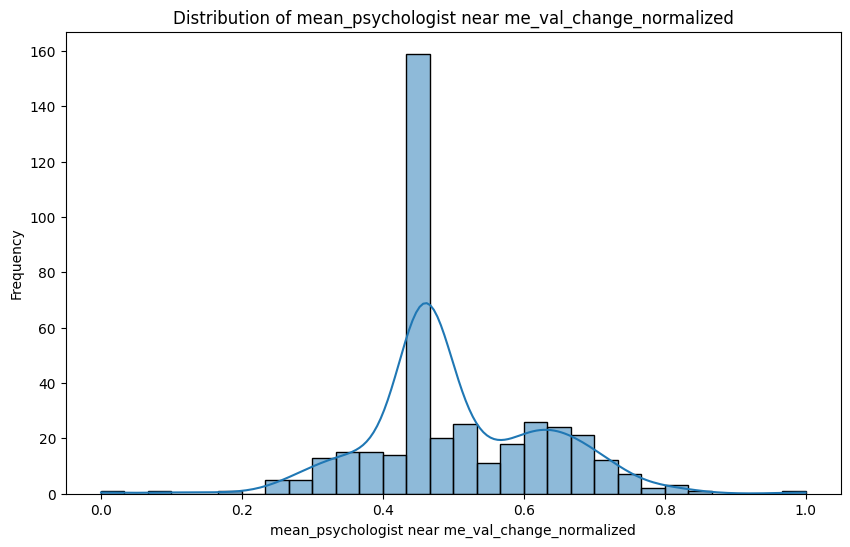

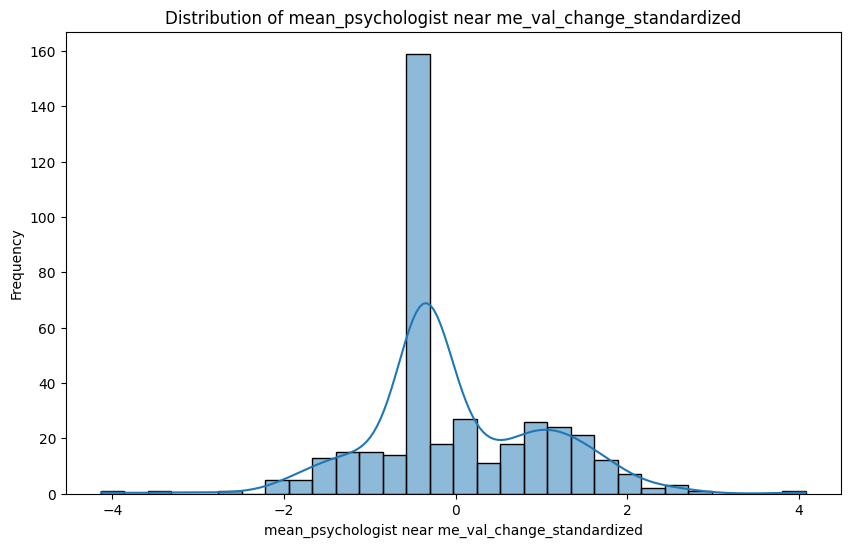

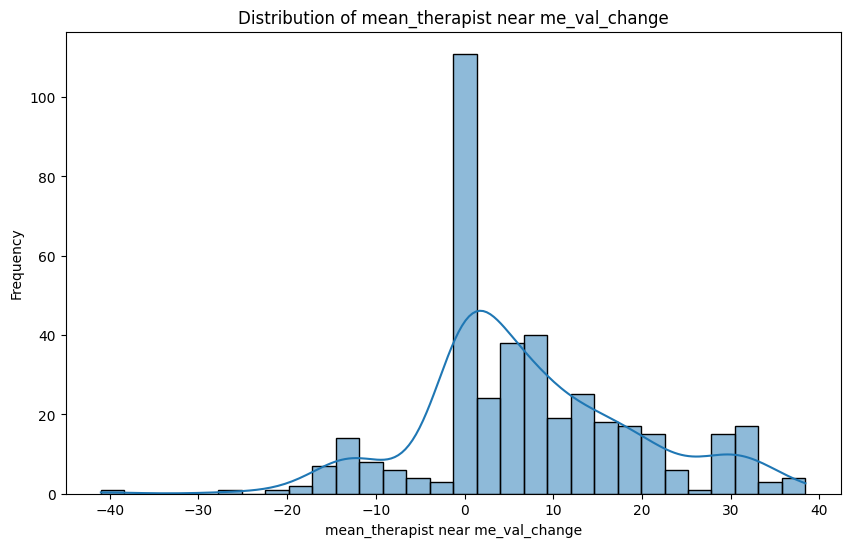

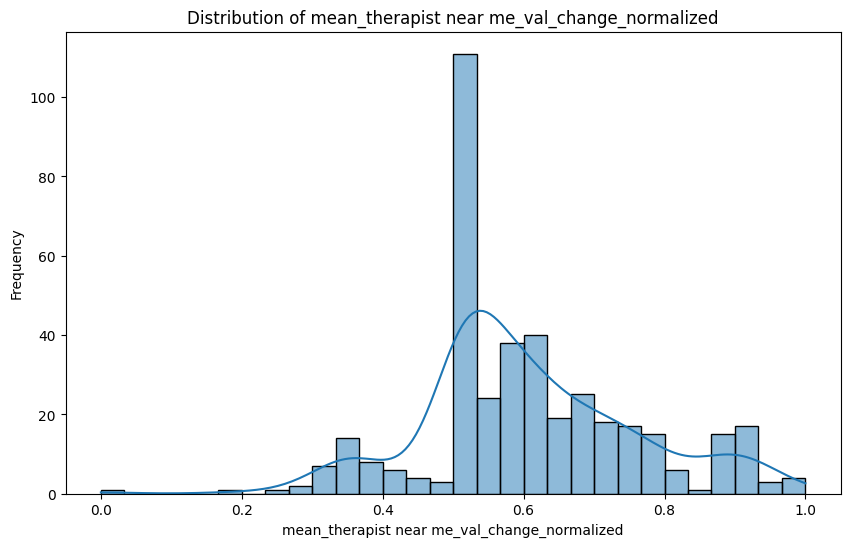

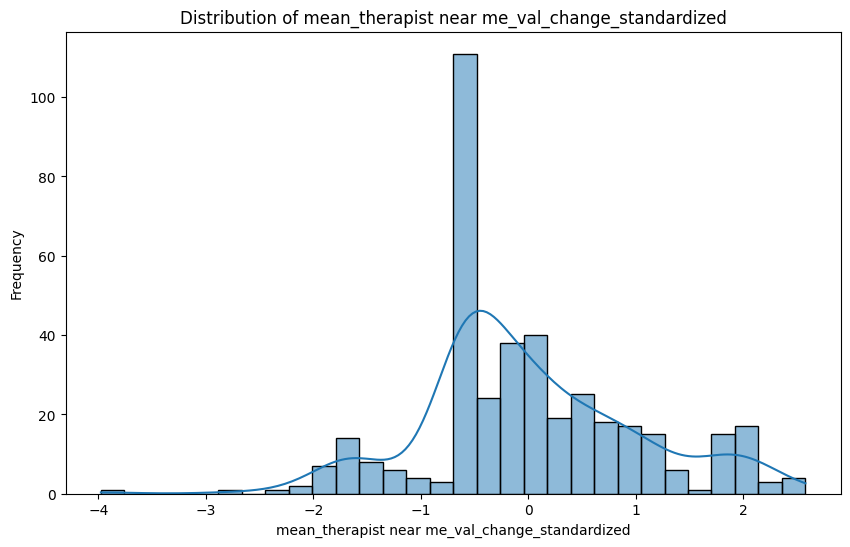

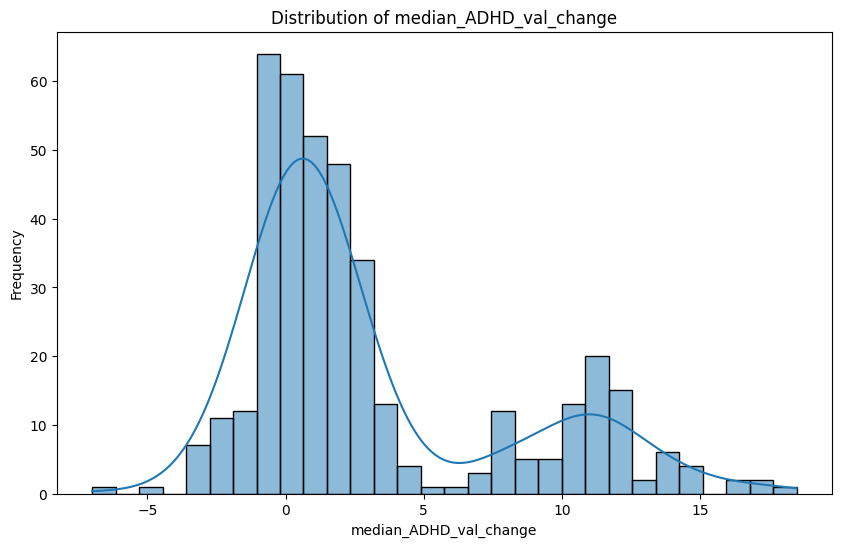

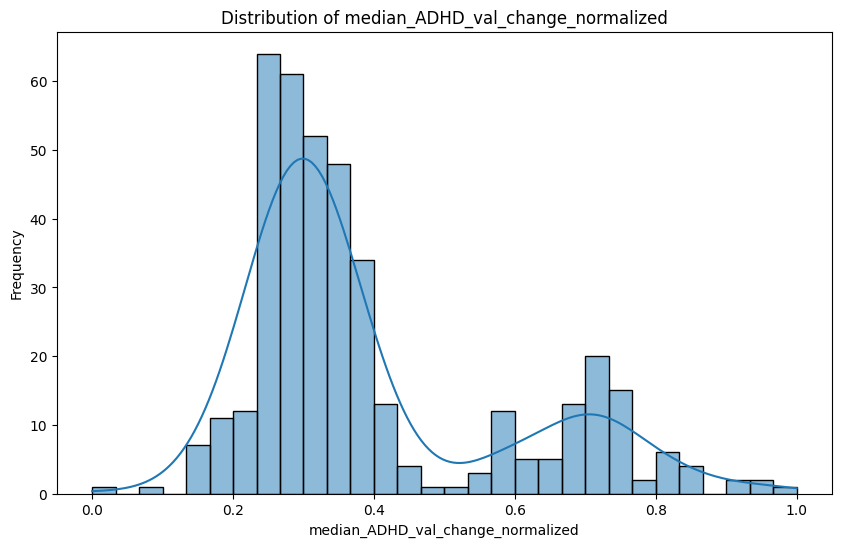

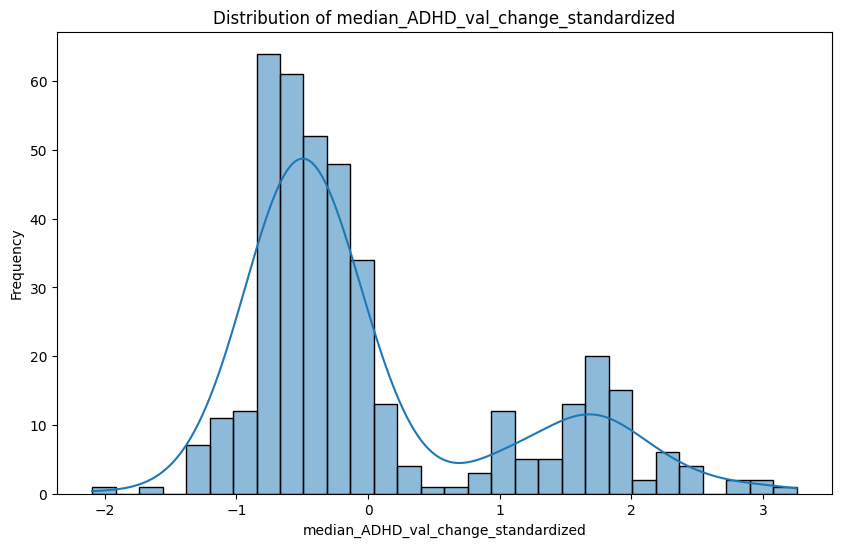

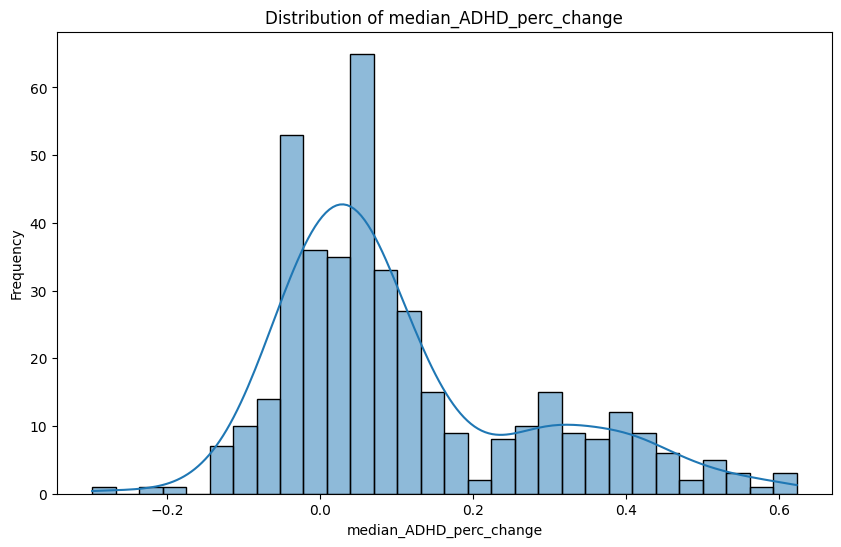

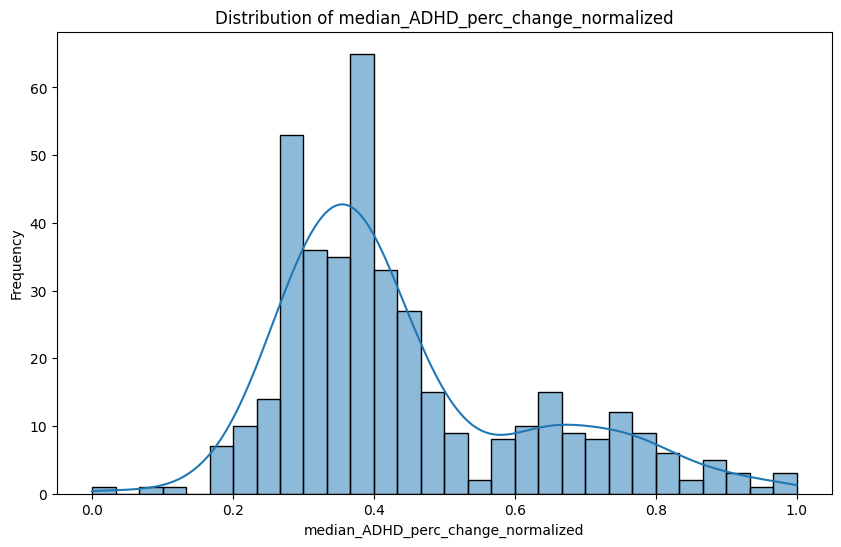

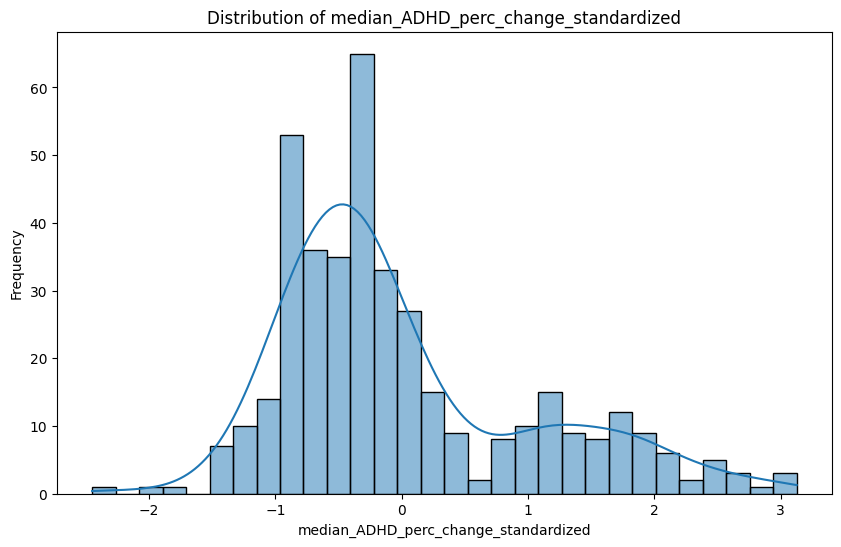

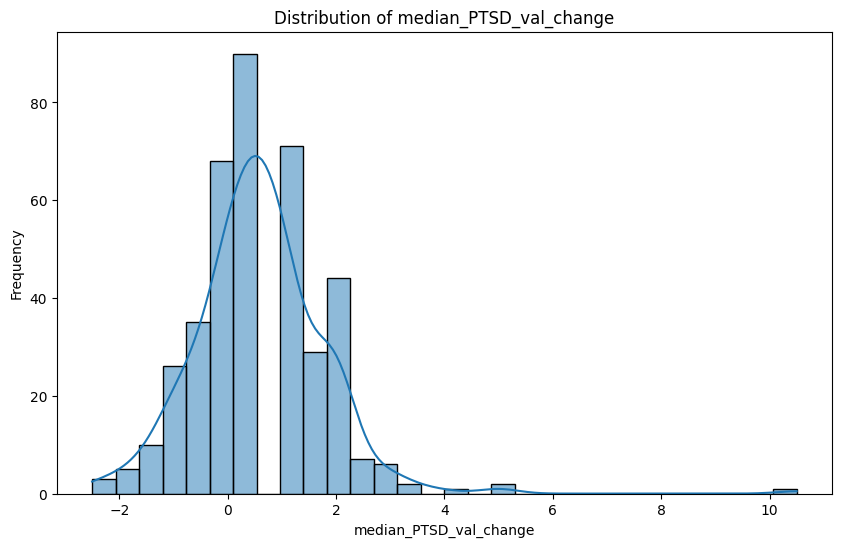

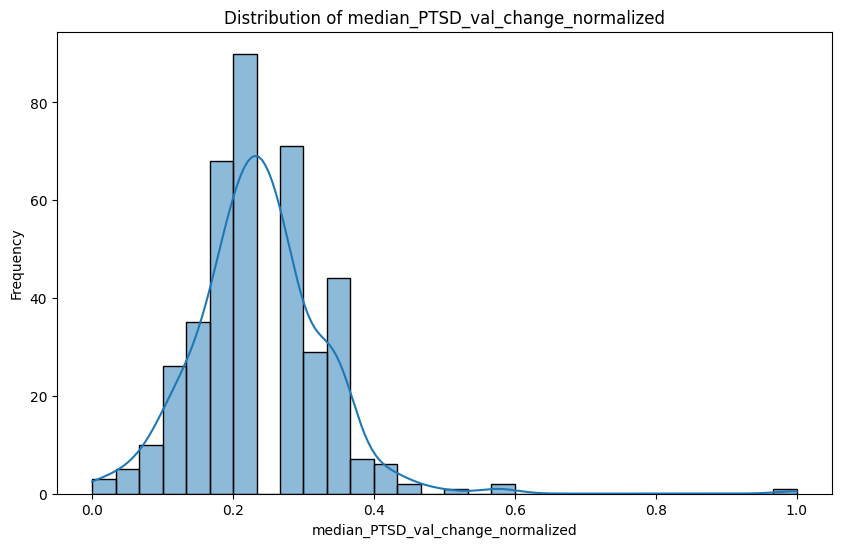

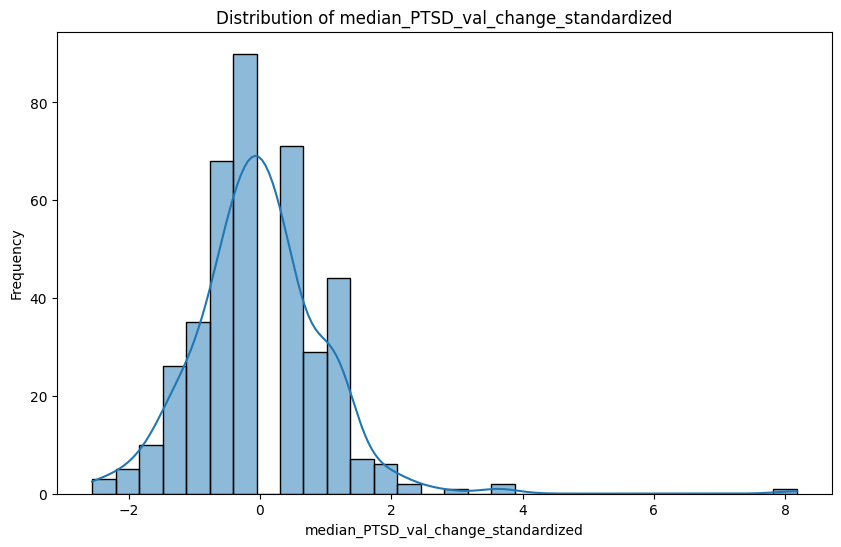

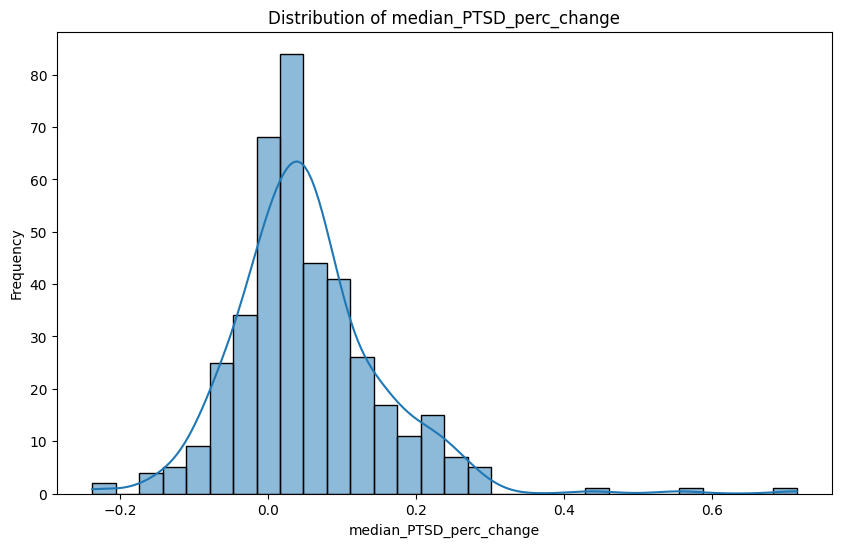

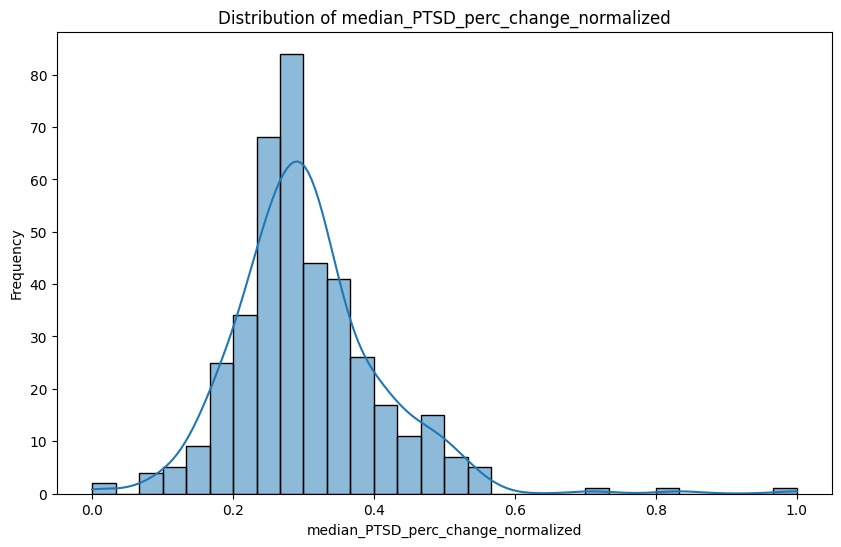

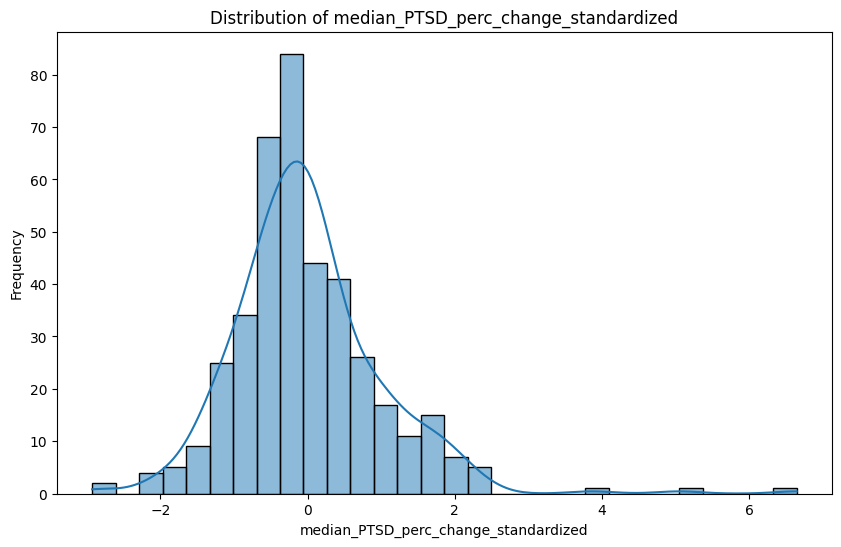

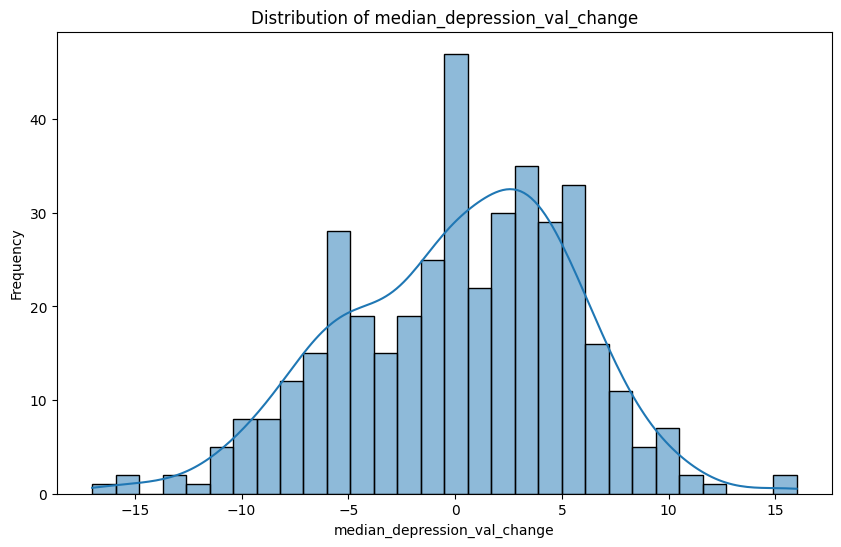

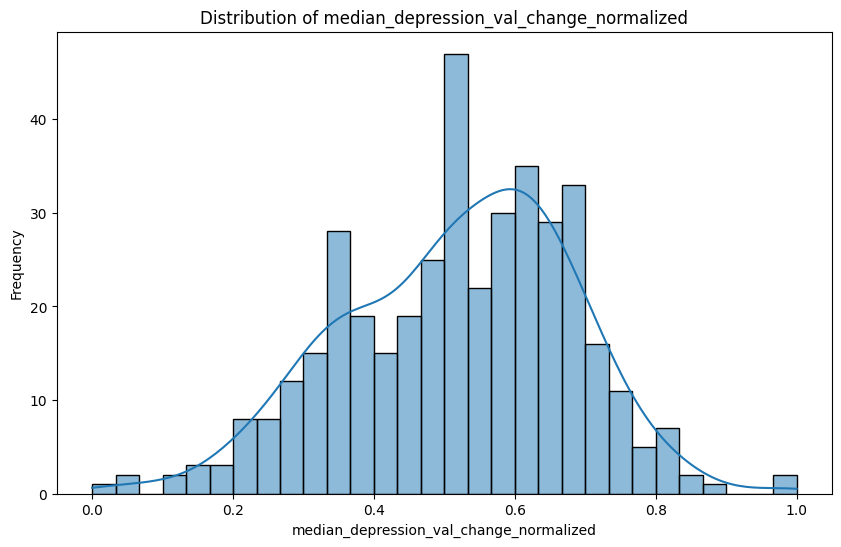

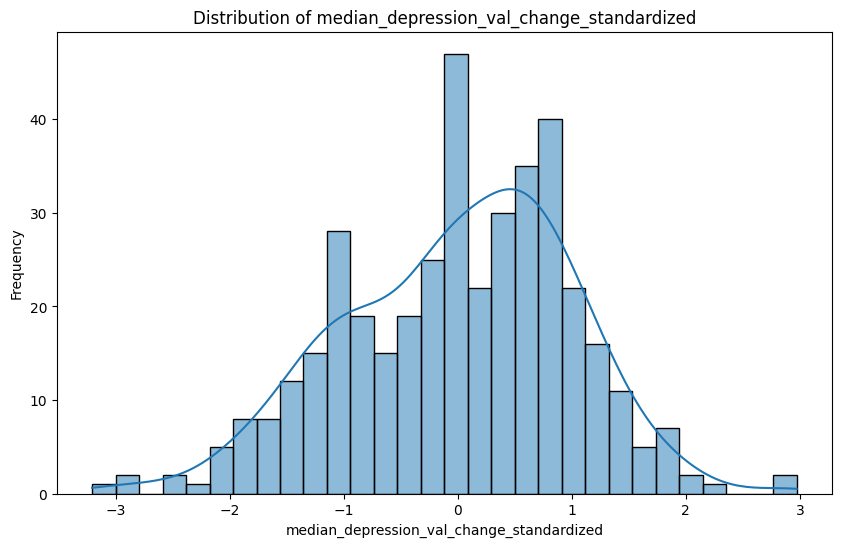

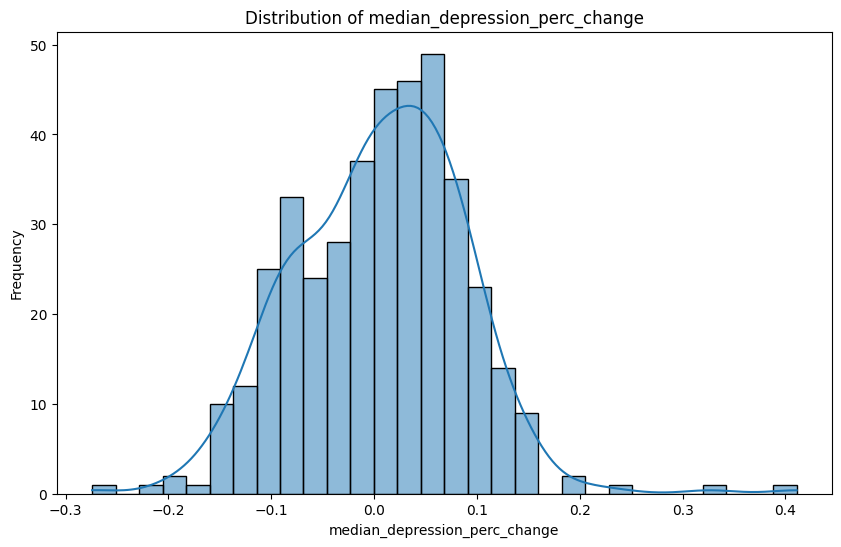

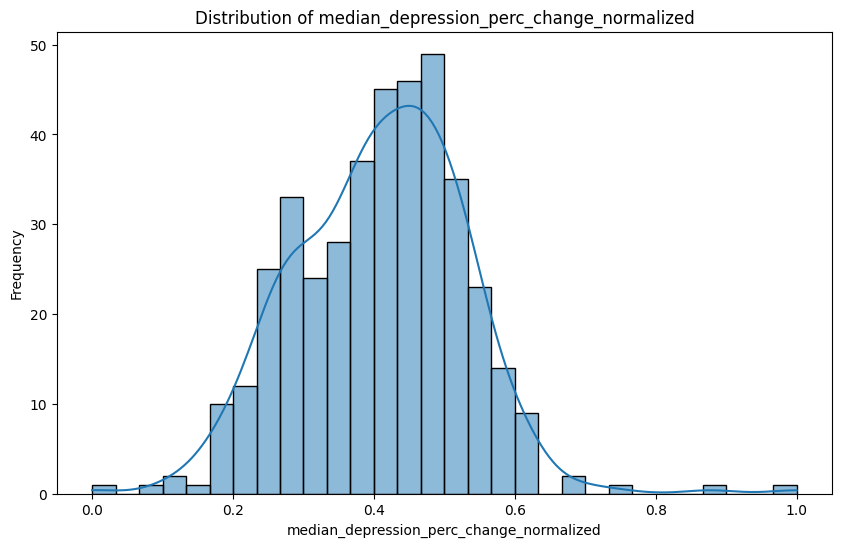

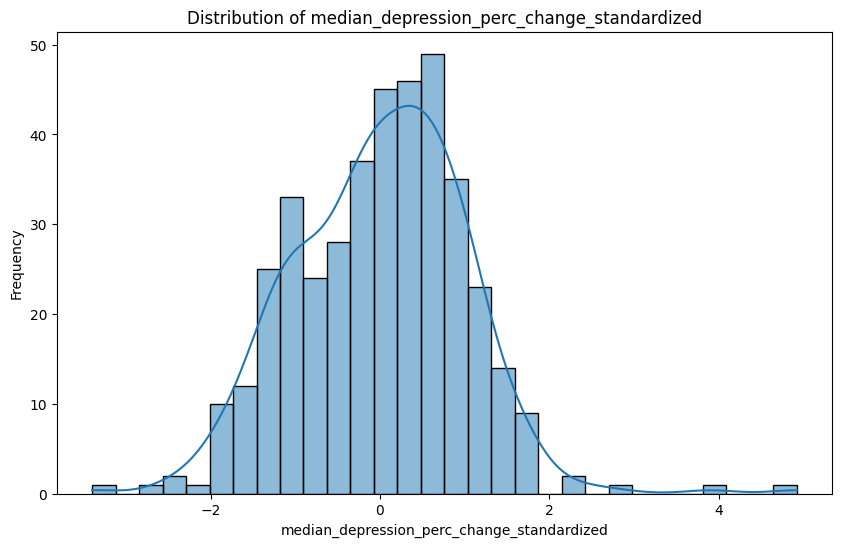

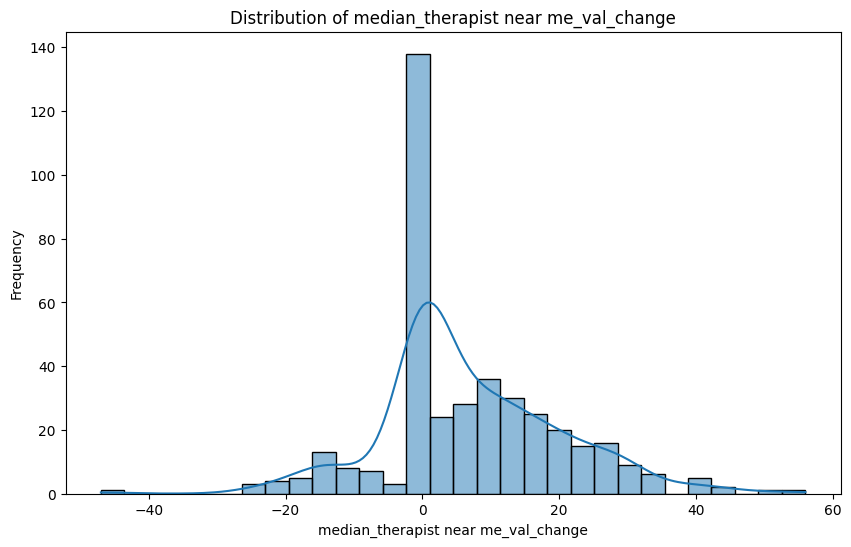

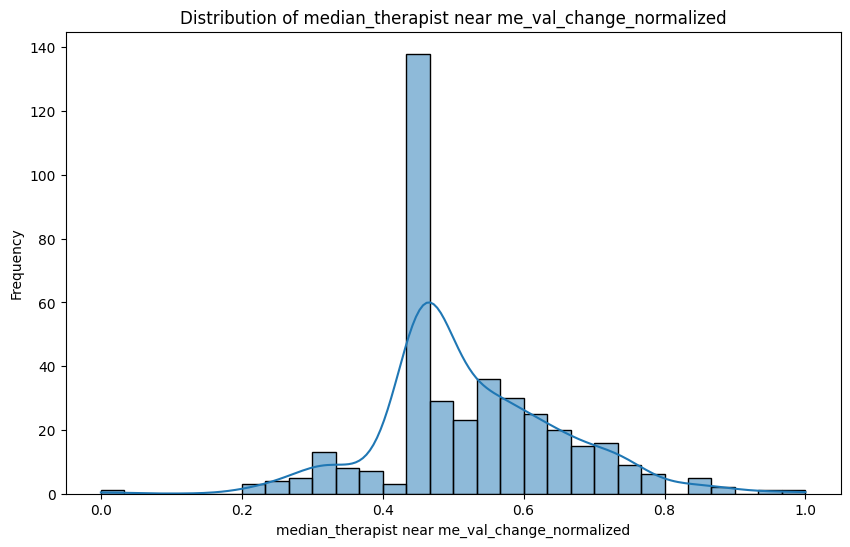

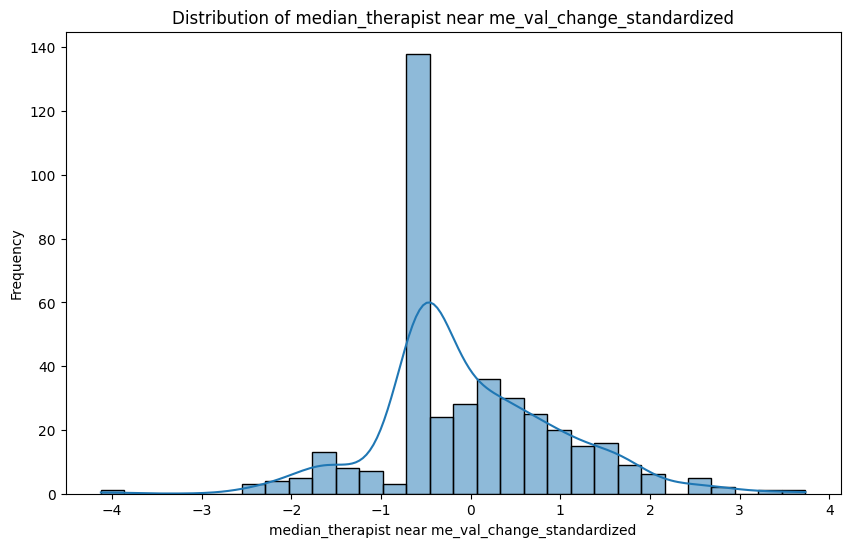

In [11]:
cols = [
    "mean_ADHD_val_change", "mean_ADHD_perc_change", "mean_PTSD_val_change", "mean_PTSD_perc_change",
    "mean_anxiety_val_change", "mean_anxiety_perc_change", "mean_bipolar_val_change", "mean_bipolar_perc_change",
    "mean_depression_val_change", "mean_depression_perc_change", "mean_mental hospital_val_change",
    "mean_mental hospital_perc_change", "mean_psychologist near me_val_change", "mean_psychologist near me_perc_change",
    "mean_psychiatrists near me_val_change", "mean_psychiatrists near me_perc_change", "mean_therapist near me_val_change",
    "mean_therapist near me_perc_change", "median_ADHD_val_change", "median_ADHD_perc_change", "median_PTSD_val_change",
    "median_PTSD_perc_change", "median_anxiety_val_change", "median_anxiety_perc_change", "median_bipolar_val_change",
    "median_bipolar_perc_change", "median_depression_val_change", "median_depression_perc_change",
    "median_mental hospital_val_change", "median_mental hospital_perc_change", "median_psychologist near me_val_change",
    "median_psychologist near me_perc_change", "median_psychiatrists near me_val_change", "median_psychiatrists near me_perc_change",
    "median_therapist near me_val_change", "median_therapist near me_perc_change", "UTIL_RATE_val_change", "UTIL_RATE_perc_change"
]
normal_distributed_cols = []

for col in cols:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    df[col].fillna(df[col].median(), inplace=True)
    # plot_distribution(df, col)
    # check_normal_distribution(df, col)
    if check_normal_distribution(df, col):
        normal_distributed_cols.append(col)
    df = normalize_and_standardize_column(df, col)
    if check_normal_distribution(df, f'{col}_normalized'):
        normal_distributed_cols.append(f'{col}_normalized')
    if check_normal_distribution(df, f'{col}_standardized'):
        normal_distributed_cols.append(f'{col}_standardized')

print(normal_distributed_cols)
for col in normal_distributed_cols:
    plot_distribution(df, col)